#Анализ базы вакансий (введение)


- Цель проекта:
1. Описание “идеальных кандидатов” на должности Аналитик данных и специалист по Data Science для различных грейдов.
2. Определение типичного места работы для Аналитика данных и специалиста по Data Science.
3. Расчет помесячной динамики количества вакансий для Аналитика данных и специалиста по Data Science. Для различных грейдов.
4. Выявить различия в предлагаемых вакансиях для Аналитиков данных и специалистов по Data Science.

<br> ***Описание данных***: Данные получены из API HH.ru, выгружены два файла с вакансиями аналитиков данных и Data Scientist. Оба файла имеют следующие столбцы:
- - **id** - идентификационный номер
- - **name** - наименование вакансии
- - **published_at** - дата публикации
- - **alternate_url** - ссылка на вакансию с сайта hh.ru
- - **type** - тип вакансии (открытая/закрытая)
- - **employer** - работодатель
- - **department** - отдел работодателя
- - **area** - место работы
- - **experience** - опыт работы/грейды
- - **key_skills** - ключевые навыки
- - **schedule** - формат работы/график
- - **employment** - тип занятости
- - **description** - описание вакансии
- - **description_lemmatized** - краткое описание вакансии
- - **salary_from** - уровень зарплаты "От"
- - **salary_to** - уровень зарплаты "До"
- - **salary_bin** - уровень зарплаты
- - **key_skills_from_key_skills_field** - требуемые ключевые навыки
- - **hard_skills_from_description** - ключевые "hard skills"
- - **soft_skills_from_description** - ключевые "soft skills"

Для аналитиков данных могут использоваться аббревиатуры "DA" и "ДА"
Для специалистов Data Scientist могут использоваться аббревиатуры "DS","ДС", "дата-сайнтист"


**Этапы работы:**
1. Предобработка данных.
2. Исследовательский анализ данных.
3. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.
4. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дадим для грейдов Junior, Junior+, Middle, Senior.
5. Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дадим для грейдов Junior, Junior+, Middle, Senior.
6. Расчет помесячной динамики количества вакансий для Аналитика данных и специалиста по Data Science. Ответ отдельно дадим для грейдов Junior, Junior+, Middle, Senior.
7. Формулирование выводов и рекомендаций.
8. Презентация.


# Выгрузка и предобработка данных

In [1]:
# выгрузим необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import json

In [2]:
# копируем ссылку на файл, предварительно открыв доступ по ссылке на чтение
url='https://docs.google.com/spreadsheets/d/16Rhd8oOkmhMbEFJEapT8DTWzRFuncMhl/edit?usp=sharing&ouid=112914491363693762987&rtpof=true&sd=true'
# преобразуем ссылку для корректного чтения файла
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url)

vacancies_ds = pd.read_excel(url, index_col=0)
display(vacancies_ds.head())

https://drive.google.com/uc?id=16Rhd8oOkmhMbEFJEapT8DTWzRFuncMhl


,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
id,,,,,,,,,,,,,,,,,,,
67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN
81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов


In [3]:
url_one = 'https://docs.google.com/spreadsheets/d/1ALlpTEdYWV-rJxJ6A3hAMoRBTaj8-dbj/edit?usp=drive_link&ouid=112914491363693762987&rtpof=true&sd=true'
url_one='https://drive.google.com/uc?id=' + url_one.split('/')[-2]
print(url)

vacancies_da = pd.read_excel(url_one, index_col=0)
display(vacancies_da.head())


https://drive.google.com/uc?id=16Rhd8oOkmhMbEFJEapT8DTWzRFuncMhl


,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
id,,,,,,,,,,,,,,,,,,,
82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",Полный день,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN
87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN


In [4]:
vacancies_ds.info() #выводим информацию по столбцам

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 67411146 to 98135067
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   name                              662 non-null    object        
 1   published_at                      662 non-null    datetime64[ns]
 2   alternate_url                     662 non-null    object        
 3   type                              662 non-null    object        
 4   employer                          662 non-null    object        
 5   department                        270 non-null    object        
 6   area                              662 non-null    object        
 7   experience                        662 non-null    object        
 8   key_skills                        662 non-null    object        
 9   schedule                          662 non-null    object        
 10  employment                        662 non-n

In [5]:
vacancies_da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 82978778 to 98141293
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   name                              310 non-null    object        
 1   published_at                      310 non-null    datetime64[ns]
 2   alternate_url                     310 non-null    object        
 3   type                              310 non-null    object        
 4   employer                          310 non-null    object        
 5   department                        92 non-null     object        
 6   area                              310 non-null    object        
 7   experience                        310 non-null    object        
 8   key_skills                        310 non-null    object        
 9   schedule                          310 non-null    object        
 10  employment                        310 non-n

In [6]:
display(vacancies_da.describe()) #посмотрим основные статистические характеристики данных по каждому числовому признаку
vacancies_ds.describe()

,published_at,salary_from,salary_to
count,310,28.000000,25.000000
mean,2024-04-10 08:37:02.248387072,163837.500000,250528.000000
min,2024-03-06 08:13:00,60000.000000,90000.000000
25%,2024-03-28 20:27:22.249999872,117500.000000,150000.000000
50%,2024-04-14 11:46:01,150000.000000,218400.000000
75%,2024-04-22 18:49:14,187000.000000,300000.000000
max,2024-04-30 12:51:55,350000.000000,495550.000000
std,NaN,69247.894239,113524.722968


,published_at,salary_from,salary_to
count,662,53.000000,56.000000
mean,2024-04-06 22:12:30.661631744,166386.792453,265431.250000
min,2024-02-29 15:01:35,25000.000000,30000.000000
25%,2024-03-26 00:49:45,110000.000000,200000.000000
50%,2024-04-09 13:37:07,150000.000000,300000.000000
75%,2024-04-22 09:43:16.249999872,200000.000000,350000.000000
max,2024-04-30 11:41:03,350000.000000,550000.000000
std,NaN,75270.642550,115406.304603


In [7]:
vacancies_ds.isna().sum() #выведем количество пропущенных значений по каждому столбцу у дата-сайнтистов

name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          392
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         609
salary_to                           606
salary_bin                            0
key_skills_from_key_skills_field    311
hard_skills_from_description        354
soft_skills_from_description        468
dtype: int64

In [8]:
vacancies_da.isna().sum() #выведем количество пропущенных значений по каждому столбцу у дата-аналитиков

name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          218
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         282
salary_to                           285
salary_bin                            0
key_skills_from_key_skills_field    123
hard_skills_from_description        198
soft_skills_from_description        224
dtype: int64

In [9]:
vacancies_da.duplicated().sum() #проверим на наличие дубликатов вакансии дата-аналитиков

0

In [10]:
vacancies_ds.duplicated().sum() #проверим на наличие дубликатов вакансии дата-сайнтистов

0

In [11]:
# удалим возможные дубликаты по идентификационному признаку в виде индивидуализированной ссылки на вакансию
vacancies_da.drop_duplicates(subset=['alternate_url'], keep='first', inplace=True)
vacancies_ds.drop_duplicates(subset=['alternate_url'], keep='first', inplace=True)
display(vacancies_da.info())
vacancies_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 82978778 to 98141293
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   name                              310 non-null    object        
 1   published_at                      310 non-null    datetime64[ns]
 2   alternate_url                     310 non-null    object        
 3   type                              310 non-null    object        
 4   employer                          310 non-null    object        
 5   department                        92 non-null     object        
 6   area                              310 non-null    object        
 7   experience                        310 non-null    object        
 8   key_skills                        310 non-null    object        
 9   schedule                          310 non-null    object        
 10  employment                        310 non-n

None

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 67411146 to 98135067
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   name                              662 non-null    object        
 1   published_at                      662 non-null    datetime64[ns]
 2   alternate_url                     662 non-null    object        
 3   type                              662 non-null    object        
 4   employer                          662 non-null    object        
 5   department                        270 non-null    object        
 6   area                              662 non-null    object        
 7   experience                        662 non-null    object        
 8   key_skills                        662 non-null    object        
 9   schedule                          662 non-null    object        
 10  employment                        662 non-n

**Выводы** :

# Исследовательский анализ данных

Посмотрим в каких городах размещены вакансии по двум направлением и выявим топ-5 городов по кол-ву размещенных вакансий

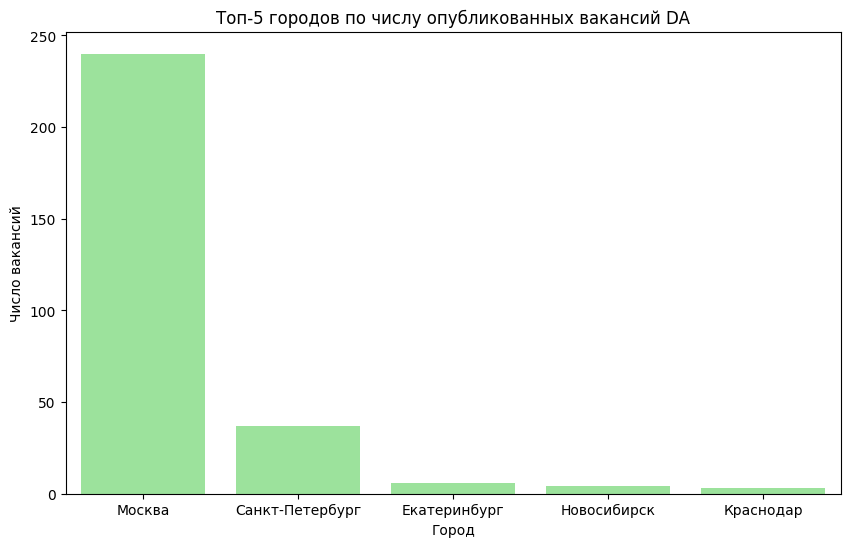

None

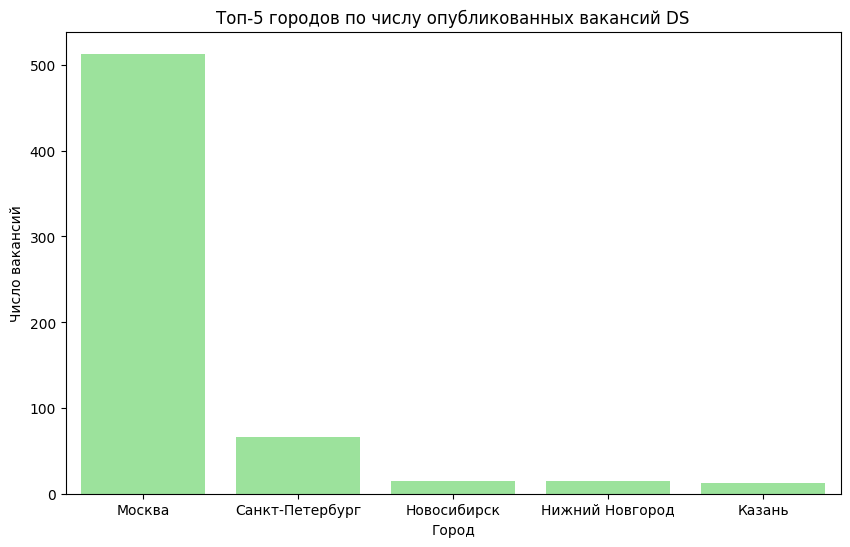

None

In [12]:
top_cities_da = vacancies_da['area'].value_counts().head(5)
top_cities_ds = vacancies_ds['area'].value_counts().head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities_da.index, y=top_cities_da.values,color='lightgreen')
plt.title('Топ-5 городов по числу опубликованных вакансий DA')
plt.xlabel('Город')
plt.ylabel('Число вакансий')
#plt.xticks(rotation=45)
display(plt.show())

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities_ds.index, y=top_cities_ds.values,color='lightgreen')
plt.title('Топ-5 городов по числу опубликованных вакансий DS')
plt.xlabel('Город')
plt.ylabel('Число вакансий')
#plt.xticks(rotation=45)
display(plt.show())

Можно определить, что безоговорочное первое место в рейтинге городов по кол-ву размещенных вакансий для обеих позиций является Москва. Санкт-Петербург также для двух должностей идет на втором месте. Для DA в топе также находятся Екатеринбург, Новосибирск и Краснодар. Для DS - Новосибирск, Нижний Новгород, Казань.

## Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.

Для начала выясним количественное соотношение вакансий аналитиков данных по грейдам, определим их доли и построим визуализации.

In [13]:
exp_da_table = pd.pivot_table(vacancies_da, index='experience', aggfunc='size').sort_values(ascending=False) #определяем кол-во вакансий в зависимости от грейдов по аналитикам
# Вывод сводной таблицы
display(exp_da_table)

experience
Junior+ (1-3 years)      178
Middle (3-6 years)       120
Junior (no experince)      9
Senior (6+ years)          3
dtype: int64

Обратим внимание, что в выборке представлено всего 3 вакансии сеньора, что фактически не может достоверно говорить о требуемых скиллах к такой позиции. Но удалять эти строки я не буду, так как это фактические данные, которые есть на данный момент в системе за определенный промежуток времени. Сделаем вывод, что востребованность сеньеров меньше, чем в других вакансиях. На то может быть ряд причин - поиск таких людей среди "своих", высокая степень уверенности в человеке, ввиду огромной ответственности сеньера за проект, невысокая потребность в приницпе в условно руководящих должностях в этой сфере.

In [14]:
grade_counts_da = vacancies_da['experience'].value_counts(normalize=True)#определяем доли грейдов среди имеющихся данных по аналитикам
grade_counts_da.round(2)

experience
Junior+ (1-3 years)      0.57
Middle (3-6 years)       0.39
Junior (no experince)    0.03
Senior (6+ years)        0.01
Name: proportion, dtype: float64

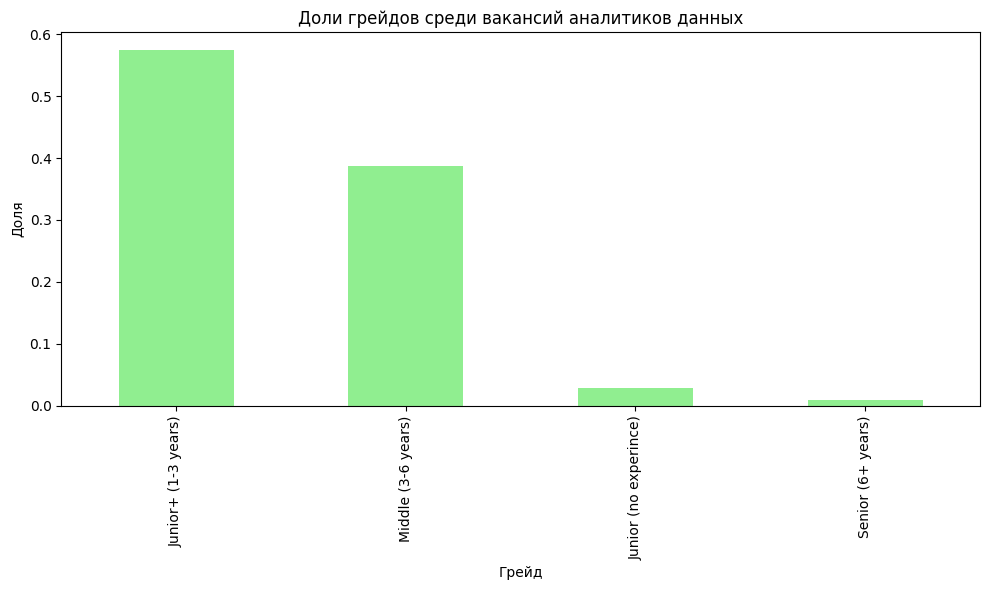

In [15]:
# Визуализация
plt.figure(figsize=(10, 6))
grade_counts_da.plot(kind='bar', color='lightgreen')
plt.title('Доли грейдов среди вакансий аналитиков данных')
plt.xlabel('Грейд')
plt.ylabel('Доля')
plt.tight_layout()
plt.show()

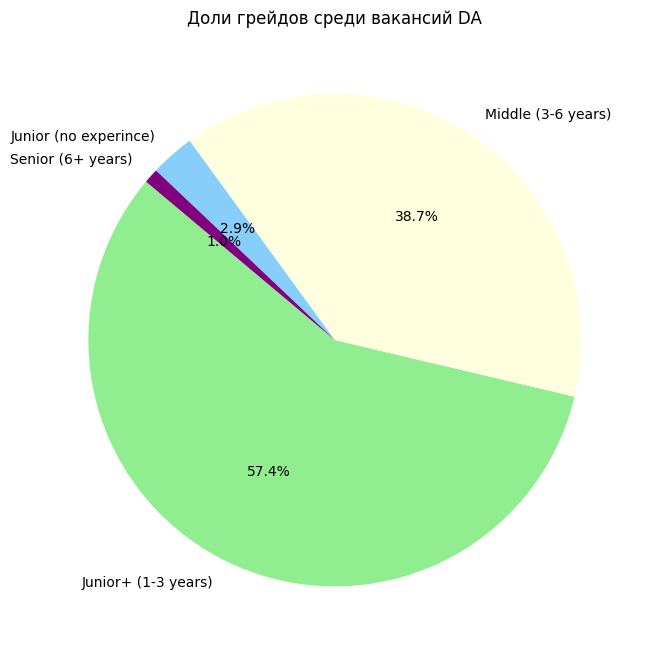

In [16]:
# Построение круговой диаграммы

plt.figure(figsize=(8, 8))
plt.pie(grade_counts_da, labels=grade_counts_da.index, autopct='%1.1f%%', startangle=140, colors = ['lightgreen', 'lightyellow', 'lightskyblue', 'purple'])
plt.title('Доли грейдов среди вакансий DA')
plt.show()

По представленным данным вакансий в разрезе аналитиков можем наблюдать, что доля позиций Джуниор+ является наиболее востребованной(57,4%), а сеньёров ищут меньше всего.(1%)

 *Сделаем те же действия и для вакансий дата-сайнтистов*

In [17]:
exp_ds_table = pd.pivot_table(vacancies_ds, index='experience', aggfunc='size').sort_values(ascending=False) #определяем кол-во вакансий в зависимости от грейдов по аналитикам
# Вывод сводной таблицы
display(exp_ds_table)

experience
Middle (3-6 years)       324
Junior+ (1-3 years)      289
Junior (no experince)     26
Senior (6+ years)         23
dtype: int64

In [18]:
grade_counts_ds = vacancies_ds['experience'].value_counts(normalize=True)#определяем доли грейдов среди имеющихся данных по аналитикам
grade_counts_ds.round(2)

experience
Middle (3-6 years)       0.49
Junior+ (1-3 years)      0.44
Junior (no experince)    0.04
Senior (6+ years)        0.03
Name: proportion, dtype: float64

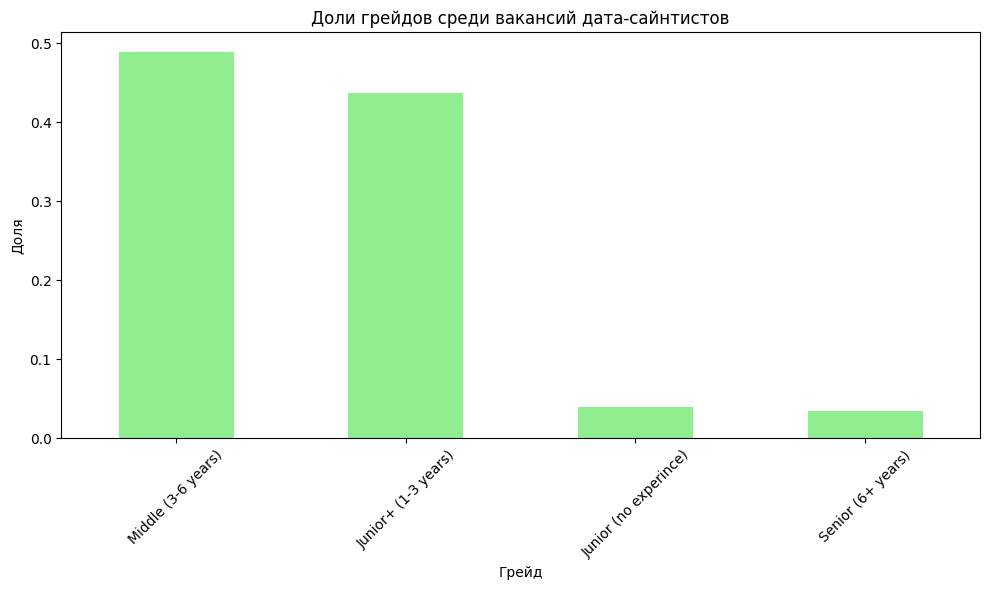

In [19]:
# Визуализация
plt.figure(figsize=(10, 6))
grade_counts_ds.plot(kind='bar', color='lightgreen')
plt.title('Доли грейдов среди вакансий дата-сайнтистов')
plt.xlabel('Грейд')
plt.ylabel('Доля')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

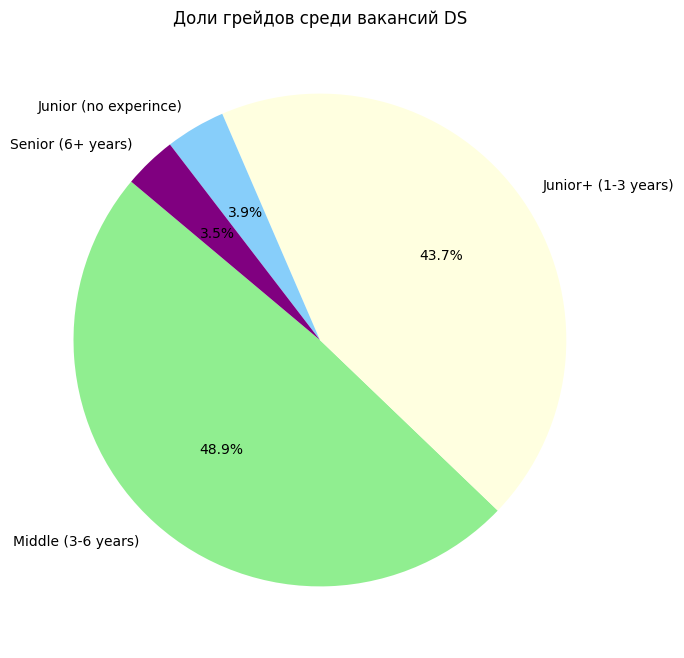

In [20]:
# Построение круговой диаграммы

plt.figure(figsize=(8, 8))
plt.pie(grade_counts_ds, labels=grade_counts_ds.index, autopct='%1.1f%%', startangle=140, colors = ['lightgreen', 'lightyellow', 'lightskyblue', 'purple'])
plt.title('Доли грейдов среди вакансий DS')
plt.show()

По представленным данным вакансий в разрезе дата-сайтнистов можем наблюдать, что больше всего востребованы "мидлы" - 48,9%, но и доля "джуниоров+" тоже не мала - 43,7%. "Джуниоры" и "сеньоры" представлены в гораздо меньшем количестве - 3,9% и 3,5%, соответственно.

##Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно рассмотрим для грейдов Junior, Junior+, Middle, Senior.

Выведем три графика для аналитиков данных с наиболее важными ключевыми навыками, хард и софт скиллами.

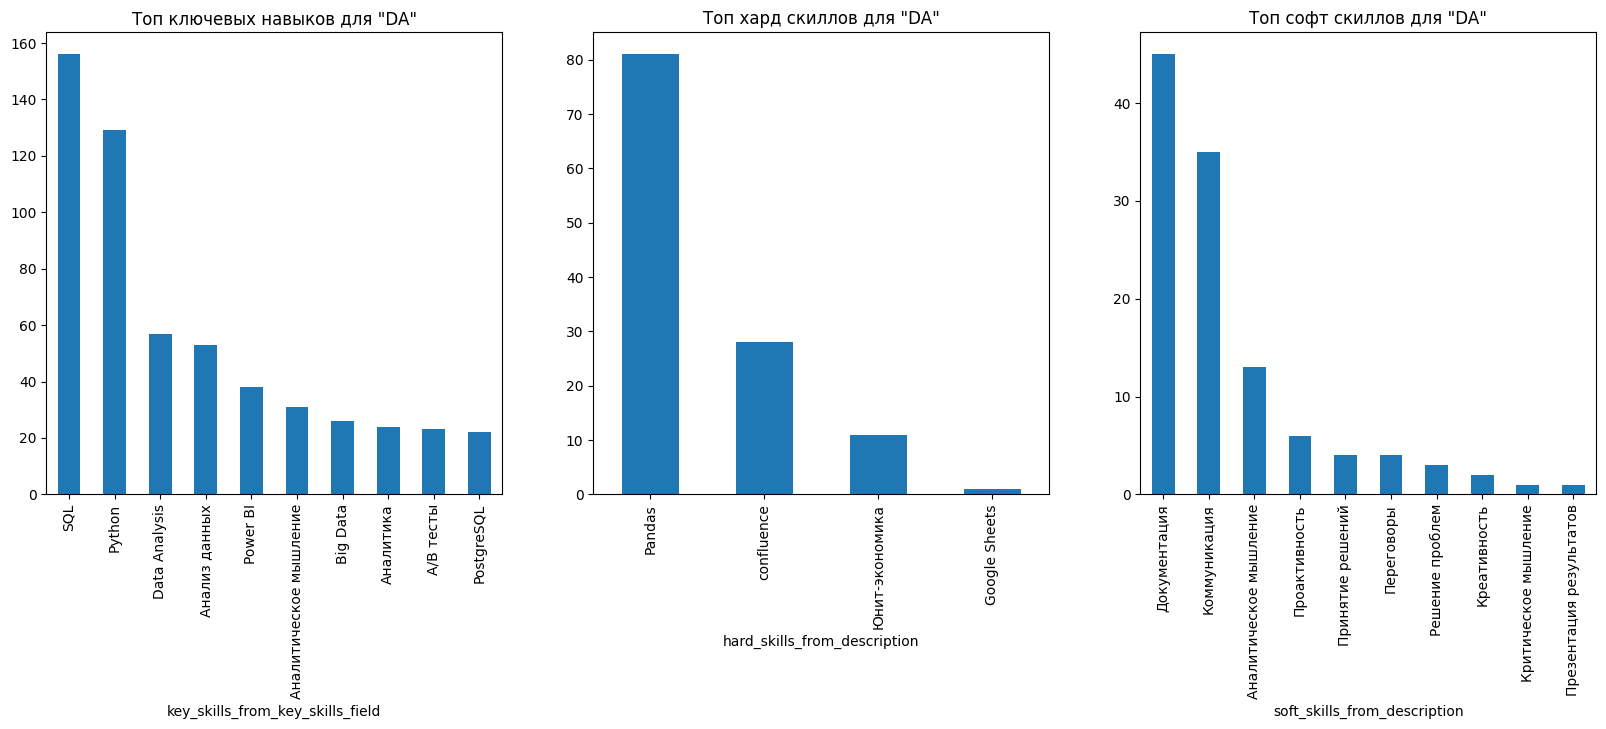

In [21]:
# Разделение ключевых навыков для дата-аналитиков
key_skills_da = vacancies_da['key_skills_from_key_skills_field'].str.split(',').explode().str.strip()
hard_skills_da = vacancies_da['hard_skills_from_description'].str.split(',').explode().str.strip()
soft_skills_da = vacancies_da['soft_skills_from_description'].str.split(',').explode().str.strip()

# Топ 10 ключевых навыков
top_key_skills_da = key_skills_da.value_counts().head(10)

# Топ 10 хард скиллов
top_hard_skills_da = hard_skills_da.value_counts().head(10)

# Топ 10 софт скиллов
top_soft_skills_da = soft_skills_da.value_counts().head(10)

# Визуализация
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
top_key_skills_da.plot(kind='bar')
plt.title('Топ ключевых навыков для "DA"')
plt.subplot(1,3,2)
top_hard_skills_da.plot(kind='bar')
plt.title('Топ хард скиллов для "DA"')
plt.subplot(1,3,3)
top_soft_skills_da.plot(kind='bar')
plt.title('Топ софт скиллов для "DA"')
#plt.tight_layout()
plt.show()

Для аналитиков данных:
- Ключевыми навыками являются знание sql,python, data analysis.
- Топ хард скиллов - pandas, confluence, юнит-экономика
- Топ софт скиллов - знание документации, коммуникация и аналитическое мышление

Выведем три графика для дата сайнтистов с наиболее важными ключевыми навыками, хард и софт скиллами.

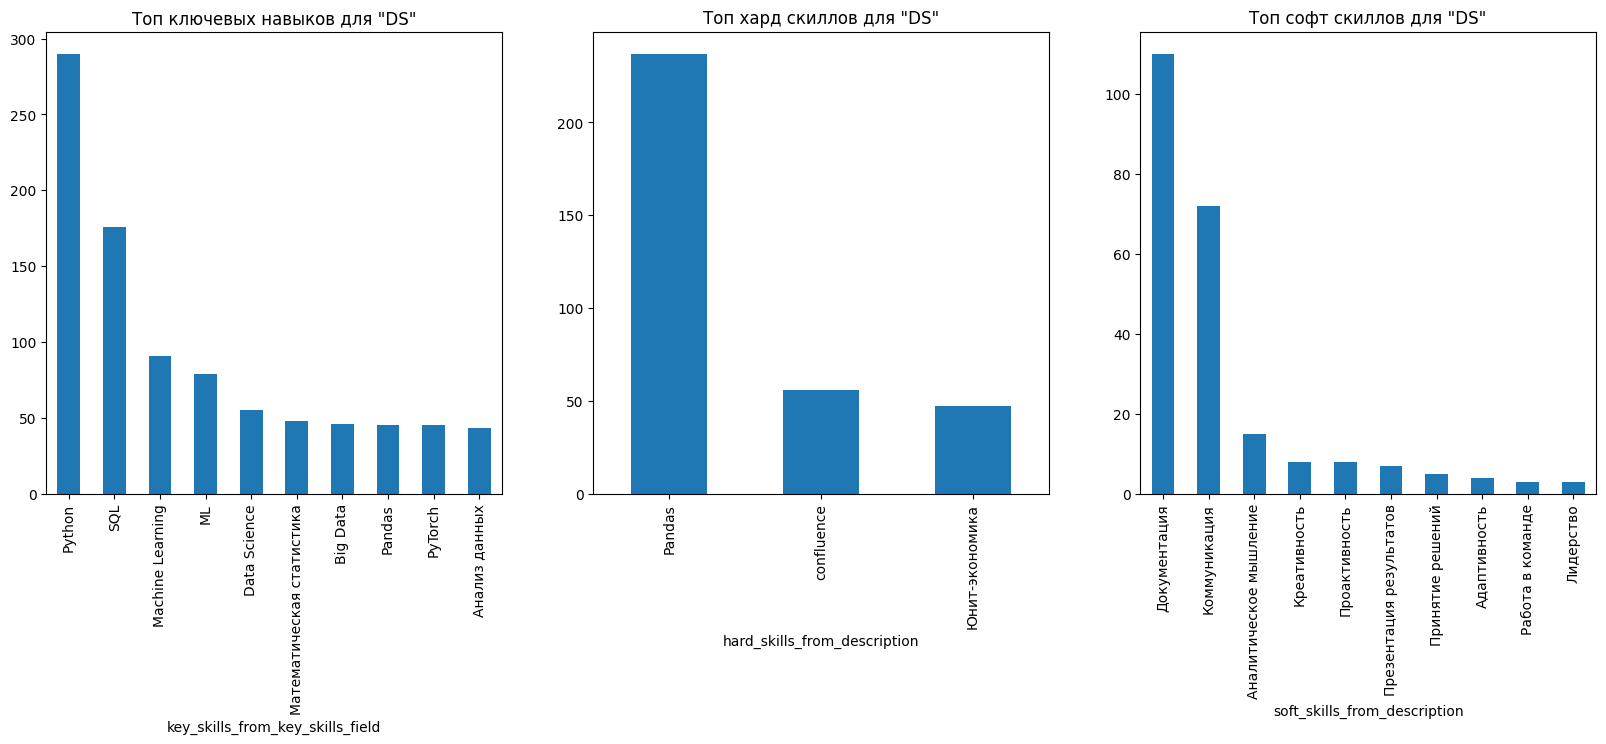

In [22]:
# Разделение ключевых навыков
key_skills_ds = vacancies_ds['key_skills_from_key_skills_field'].str.split(',').explode().str.strip()
hard_skills_ds = vacancies_ds['hard_skills_from_description'].str.split(',').explode().str.strip()
soft_skills_ds = vacancies_ds['soft_skills_from_description'].str.split(',').explode().str.strip()

# Топ 10 ключевых навыков
top_key_skills_ds = key_skills_ds.value_counts().head(10)

# Топ 10 хард скиллов
top_hard_skills_ds = hard_skills_ds.value_counts().head(10)

# Топ 10 софт скиллов
top_soft_skills_ds = soft_skills_ds.value_counts().head(10)

# Визуализация
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
top_key_skills_ds.plot(kind='bar')
plt.title('Топ ключевых навыков для "DS"')
plt.subplot(1,3,2)
top_hard_skills_ds.plot(kind='bar')
plt.title('Топ хард скиллов для "DS"')
plt.subplot(1,3,3)
top_soft_skills_ds.plot(kind='bar')
plt.title('Топ софт скиллов для "DS"')
#plt.tight_layout()
plt.show()

Для дата-сайнтистов:
- Ключевыми навыками являются знание python,sql, machine learning.
- Топ хард скиллов - pandas, confluence, юнит-экономика
- Топ софт скиллов - знание документации, коммуникация и аналитическое мышление

По представленным данным можно сделать вывод, что хард и софт скилы в целом похожи для обеих должностей. Одно из ключевых отличий - для ds востребовано знание machine learning. Скорее всего в представленной выборке под этим термином также используется аббревиатура ML

### Определение наиболее востребованных ключевых навыков, софт и хард скилов в зависимости от грейда вакансии "аналитик данных"

Для начала сделаем выборку по ключевым навыкам

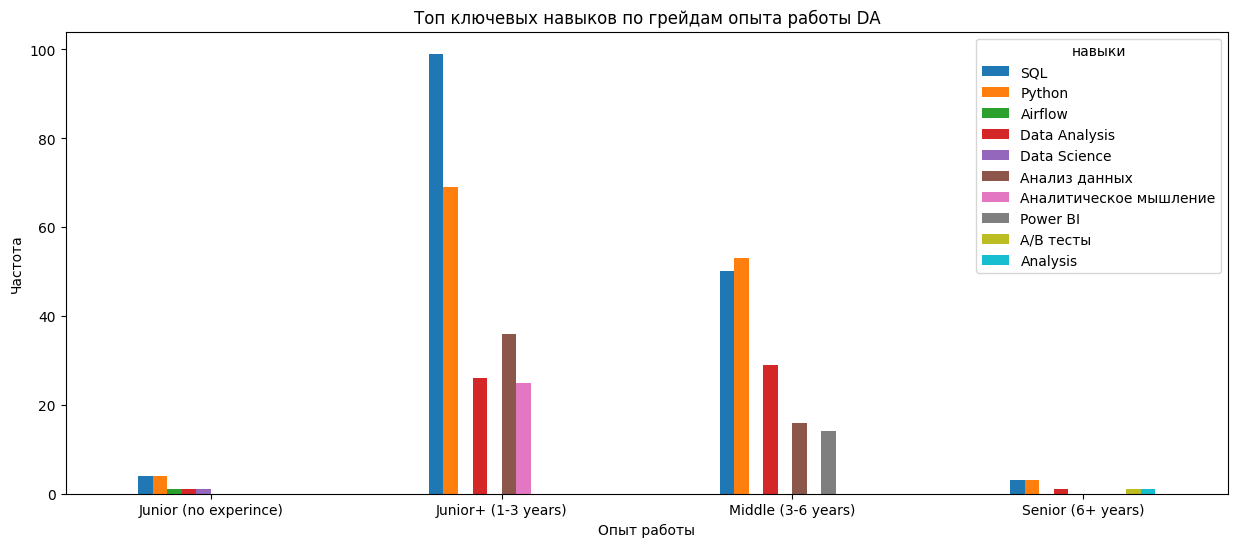

In [23]:
top_key_skills_by_experience = key_skills_da.groupby(vacancies_da['experience']).value_counts().groupby(level=0).head(5)

top_key_skills_by_experience.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ ключевых навыков по грейдам опыта работы DA')
plt.xlabel('Опыт работы')
plt.ylabel('Частота')
plt.legend(title='навыки')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта наиболее важными навыками явлются знание sql и python, также важны, но меньше ранее названных - знание airflow, data analysis, data science
- для джунов с опытом работы первоочередным ключевым навыком является знание sql, далее идет python, также можно выделить знание анализа данных и аналитическое мышление
- для мидлов знание python становится чуть более востребованным, чем sql. Также важны знания в области data analysis и power bi
- для сеньоров важны навыки в области sql,python, data analysis, а/в тестировании и analysis

***сделаем выборку по софт-скиллам da***

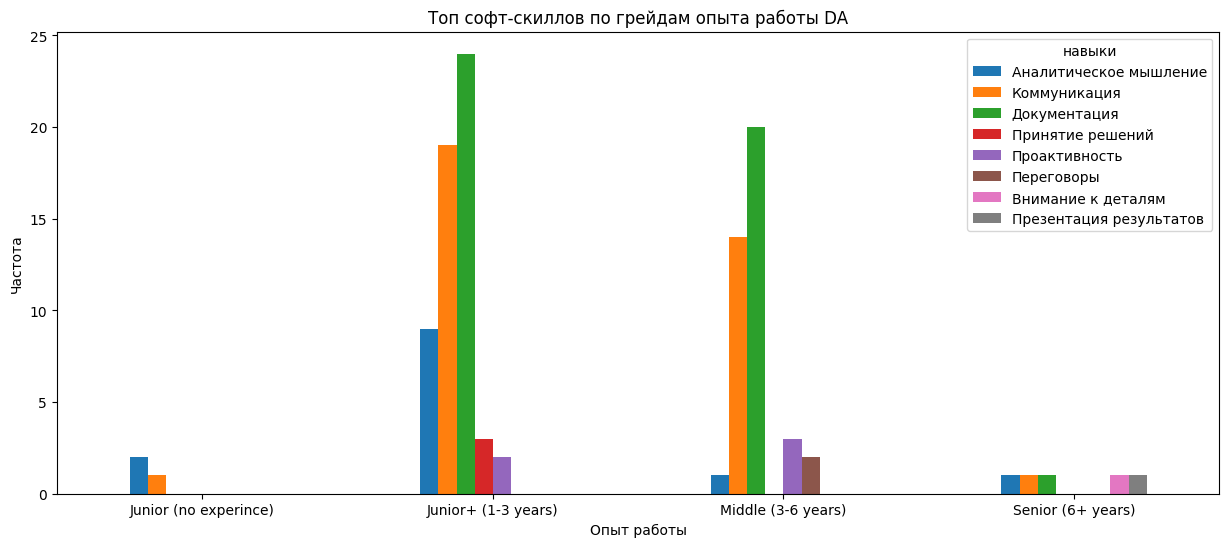

In [24]:
top_soft_skills_da_by_experience = soft_skills_da.groupby(vacancies_da['experience']).value_counts().groupby(level=0).head(5)

top_soft_skills_da_by_experience.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ софт-скиллов по грейдам опыта работы DA')
plt.xlabel('Опыт работы')
plt.ylabel('Частота')
plt.legend(title='навыки')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта наиболее важными навыками являются аналитическое мышление и коммуникация
- для джунов с опытом работы становится наиболее важным знание документации, также навыки коммуникации и аналитическое мышление, принятие решений и проактивность
- для мидлов важны знание документации, навыки коммуникации, проактивная позиция, владение мастерством переговоров и аналитическое мышление
- для сеньоров вышеперечисленные навыки важны в равном объеме

***сделаем выборку по хард-скиллам da***

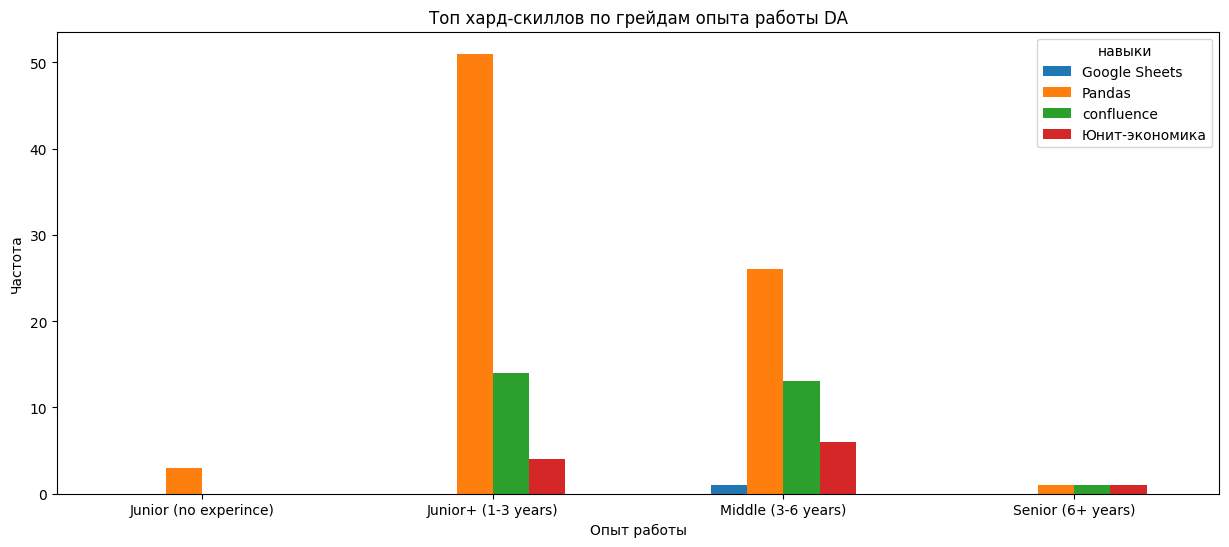

In [25]:
top_hard_skills_da_by_experience = hard_skills_da.groupby(vacancies_da['experience']).value_counts().groupby(level=0).head(5)

top_hard_skills_da_by_experience.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ хард-скиллов по грейдам опыта работы DA')
plt.xlabel('Опыт работы')
plt.ylabel('Частота')
plt.legend(title='навыки')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта наиболее важным хард-скиллом является знание библиотеки pandas
- для джунов с опытом работы важны знание pandas, confluence, юнит-экономика
- для мидлов важны pandas, confluence, юнит-экономика и в меньшей степени google-sheets
- для сеньоров навыки pandas, confluence, юнит-экономика  важны в равном объеме

### Определение наиболее востребованных ключевых навыков, софт и хард скилов в завимости от грейда ваканасии "специалист по data science"

Сделаем выборку по ключевым навыкам

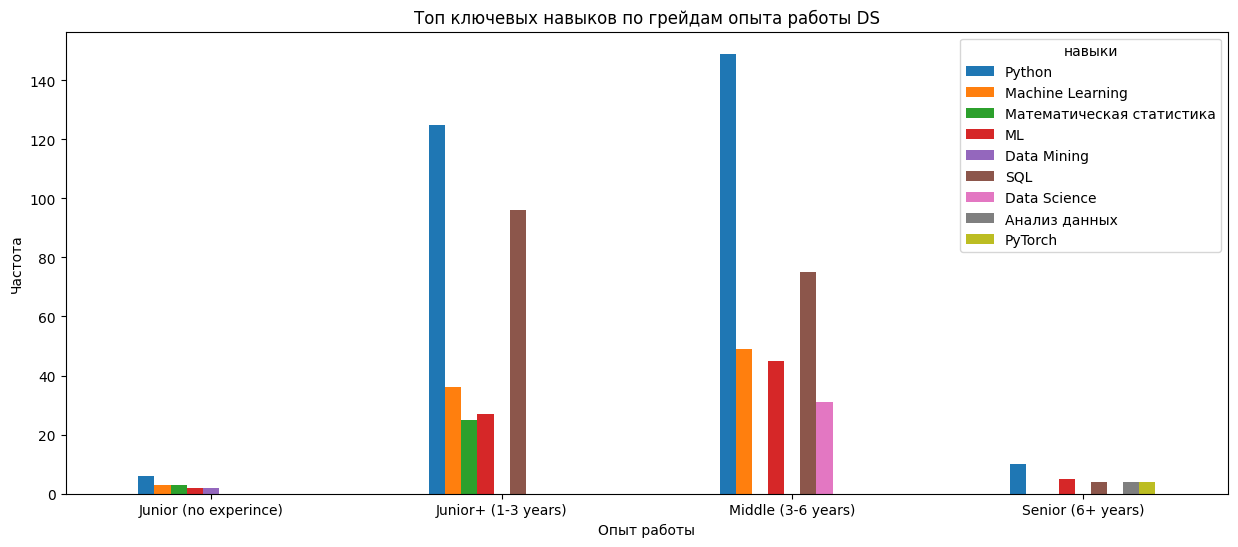

In [26]:
top_key_skills_by_experience_ds = key_skills_ds.groupby(vacancies_ds['experience']).value_counts().groupby(level=0).head(5)

top_key_skills_by_experience_ds.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ ключевых навыков по грейдам опыта работы DS')
plt.xlabel('Опыт работы')
plt.ylabel('Частота')
plt.legend(title='навыки')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта наиболее важными навыком явлются знание python, также важны, но меньше ранее названного - знание machine learning и математической статистики, data mining
- для джунов с опытом работы первоочередным ключевым навыком является знание python, далее идет sql, также можно выделить знание  machine learning и математической статистики.
- для мидлов знание python становится еще более востребованным, также необходимо знание sql, machine learning, data science
- для сеньоров важны навыки в области sql,python,ml, а также появлется такое требумое умение, как знание PyTorch(в других вакансиях этому скилу не уделяется внимание)

***сделаем выборку по софт-скиллам ds***

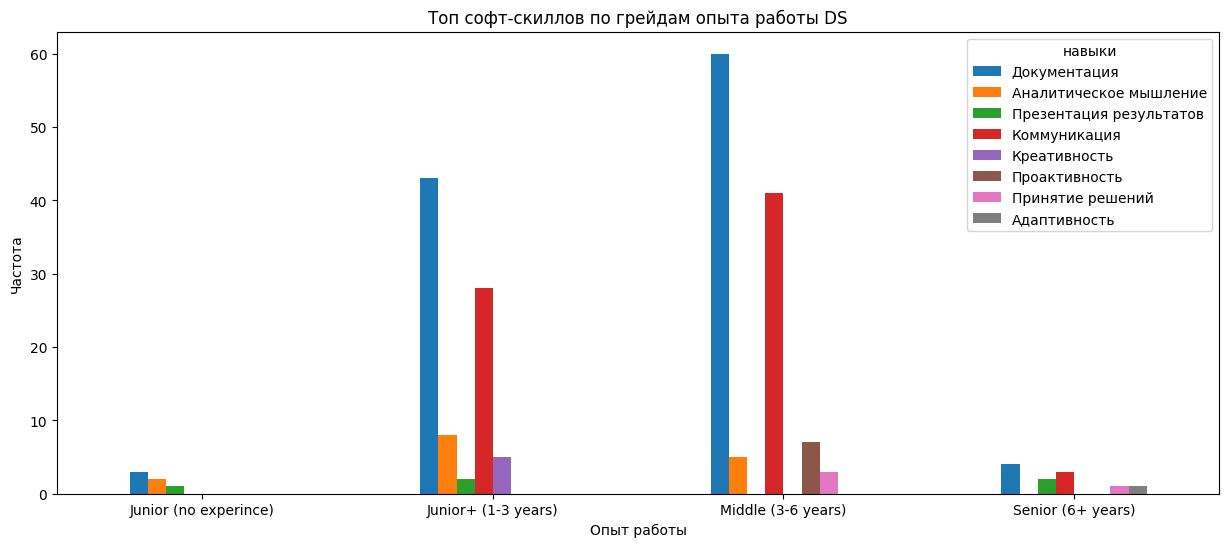

In [27]:
top_soft_skills_ds_by_experience = soft_skills_ds.groupby(vacancies_ds['experience']).value_counts().groupby(level=0).head(5)

top_soft_skills_ds_by_experience.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ софт-скиллов по грейдам опыта работы DS')
plt.xlabel('Опыт работы')
plt.ylabel('Частота')
plt.legend(title='навыки')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта наиболее важными навыками явлются знание документации, аналитическое мышление и презентация результатов
- для джунов с опытом работы становится наиболее важным знание документации, также навыки коммуникации и аналитическое мышление, креативность и презентация результатов
- для мидлов самым важным устанавливается знание документации, навыки коммуникации, проактивная позиция, умение принятия решений и аналитичсекое мышление
- для сеньоров первоочередно важны знания документации, развитые навыки коммуникации, умение презентовать результаты, принятие решений и адаптивность.

***сделаем выборку по хард-скиллам ds***

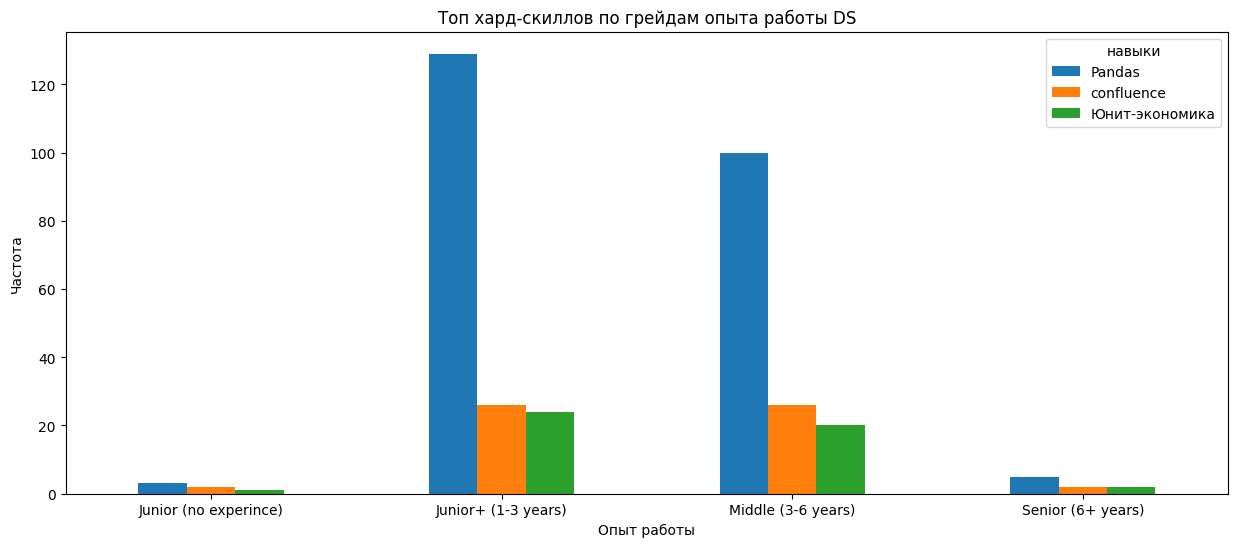

In [28]:
top_hard_skills_ds_by_experience = hard_skills_ds.groupby(vacancies_ds['experience']).value_counts().groupby(level=0).head(5)

top_hard_skills_ds_by_experience.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ хард-скиллов по грейдам опыта работы DS')
plt.xlabel('Опыт работы')
plt.ylabel('Частота')
plt.legend(title='навыки')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта наиболее важными хард-скиллами являются знание библиотеки pandas, confluence, юнит-экономика
- для джунов с опытом работы чаще других встречается знание pandas, далее - confluence, юнит-экономика
- для мидлов картина по хард скиллам практически идентична требованиям к джинуорам+
- для сеньоров также на первом месте остается pandas, а далее confluence, юнит-экономика, которые важны в равном объеме

##Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

Определим и выведем топы работодатедей, зарплат, типов занятости и графиков работы для аналитиков данных

In [29]:
top_employers_da = vacancies_da['employer'].value_counts().head(10)# Топ 10 работодателей
top_salary_bin_da = vacancies_da['salary_bin'].value_counts().head(10)#Топ 10 зарплат
top_employment_da = vacancies_da['employment'].value_counts().head(10)#Топ 10 типов занятости
top_schedule_da = vacancies_da['schedule'].value_counts().head(10)#Топ 10 графиков работ

separator = "----------------------"
print(separator)
display(top_employers_da)
print(separator)
display(top_salary_bin_da)
print(separator)
display(top_employment_da)
print(separator)
display(top_schedule_da)



----------------------


employer
СБЕР                           67
WILDBERRIES                    14
МТС                             7
МАГНИТ, Розничная сеть          6
Центр финансовых технологий     6
Okko                            6
«UZUM TECHNOLOGIES».            5
ПСБ (ПАО «Промсвязьбанк»)       5
StudyWorld                      4
Maxim technology                4
Name: count, dtype: int64

----------------------


salary_bin
ЗП не указана                285
От 200 тысяч до 300 тысяч     11
Больше 300 тысяч               7
От 100 тысяч до 200 тысяч      6
Меньше 100 тысяч               1
Name: count, dtype: int64

----------------------


employment
Полная занятость       308
Частичная занятость      2
Name: count, dtype: int64

----------------------


schedule
Полный день         236
Удаленная работа     63
Гибкий график         7
Сменный график        4
Name: count, dtype: int64

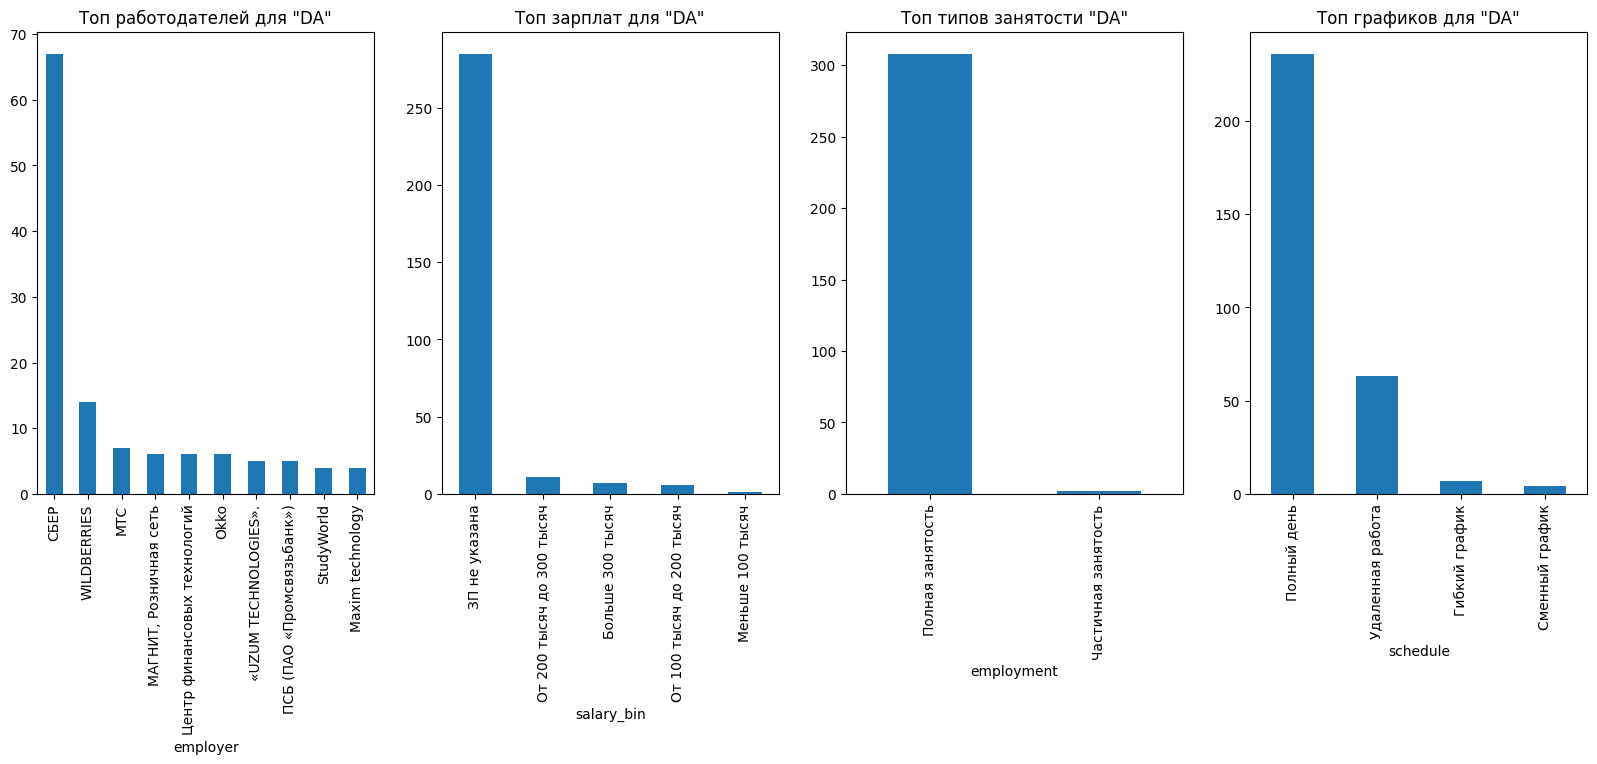

In [30]:
# Визуализация для ДА по вышеперечисленным параметрам
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
top_employers_da.plot(kind='bar')
plt.title('Топ работодателей для "DA"')
plt.subplot(1,4,2)
top_salary_bin_da.plot(kind='bar')
plt.title('Топ зарплат для "DA"')
plt.subplot(1,4,3)
top_employment_da.plot(kind='bar')
plt.title('Топ типов занятости "DA"')
plt.subplot(1,4,4)
top_schedule_da.plot(kind='bar')
plt.title('Топ графиков для "DA"')
#plt.tight_layout()
plt.show()

Для аналитиков данных:
- Большего всего вакансий представлено от Сбера(67 шт.), Wildberries(далее - WB)- 14шт., далее идут также немало известные компании, но количество вакансий представлено в пределах 4-7 штук.
- Для большинства вакансий не указана зарпалатная вилка, далее по большему количественному показателю представлены вакансии в промежутке от 200 до 300 тыс.р.
- Большинство работодателей расчитывают на соискателей с полным типом занятости
- В разрезе графика первоочередным выступает "полный день", но и "удаленка" представлена в немалом кол-ве вакансий. Гибкий и сменный график не слишком распространен.

Определим и выведем топы работодатедей, зарплат, типов занятости и графиков работы для дата-сайнтистов

In [31]:
top_employers_ds = vacancies_ds['employer'].value_counts().head(10)# Топ 10 работодателей
top_salary_bin_ds = vacancies_ds['salary_bin'].value_counts().head(10)#Топ 10 зарплат
top_employment_ds = vacancies_ds['employment'].value_counts().head(10)#Топ 10 типов занятости
top_schedule_ds = vacancies_ds['schedule'].value_counts().head(10)#Топ 10 графиков работ


display(top_employers_ds)
print(separator)
display(top_salary_bin_ds)
print(separator)
display(top_employment_ds)
print(separator)
display(top_schedule_ds)

employer
СБЕР              132
Ozon               20
Газпромбанк        17
Samokat.tech       16
Банк ВТБ (ПАО)     12
Lamoda Tech        11
WILDBERRIES        11
Ростелеком         10
Т1                  9
билайн              9
Name: count, dtype: int64

----------------------


salary_bin
ЗП не указана                606
Больше 300 тысяч              29
От 200 тысяч до 300 тысяч     14
От 100 тысяч до 200 тысяч      8
Меньше 100 тысяч               5
Name: count, dtype: int64

----------------------


employment
Полная занятость       646
Стажировка              12
Частичная занятость      2
Проектная работа         2
Name: count, dtype: int64

----------------------


schedule
Полный день         508
Удаленная работа    119
Гибкий график        32
Сменный график        3
Name: count, dtype: int64

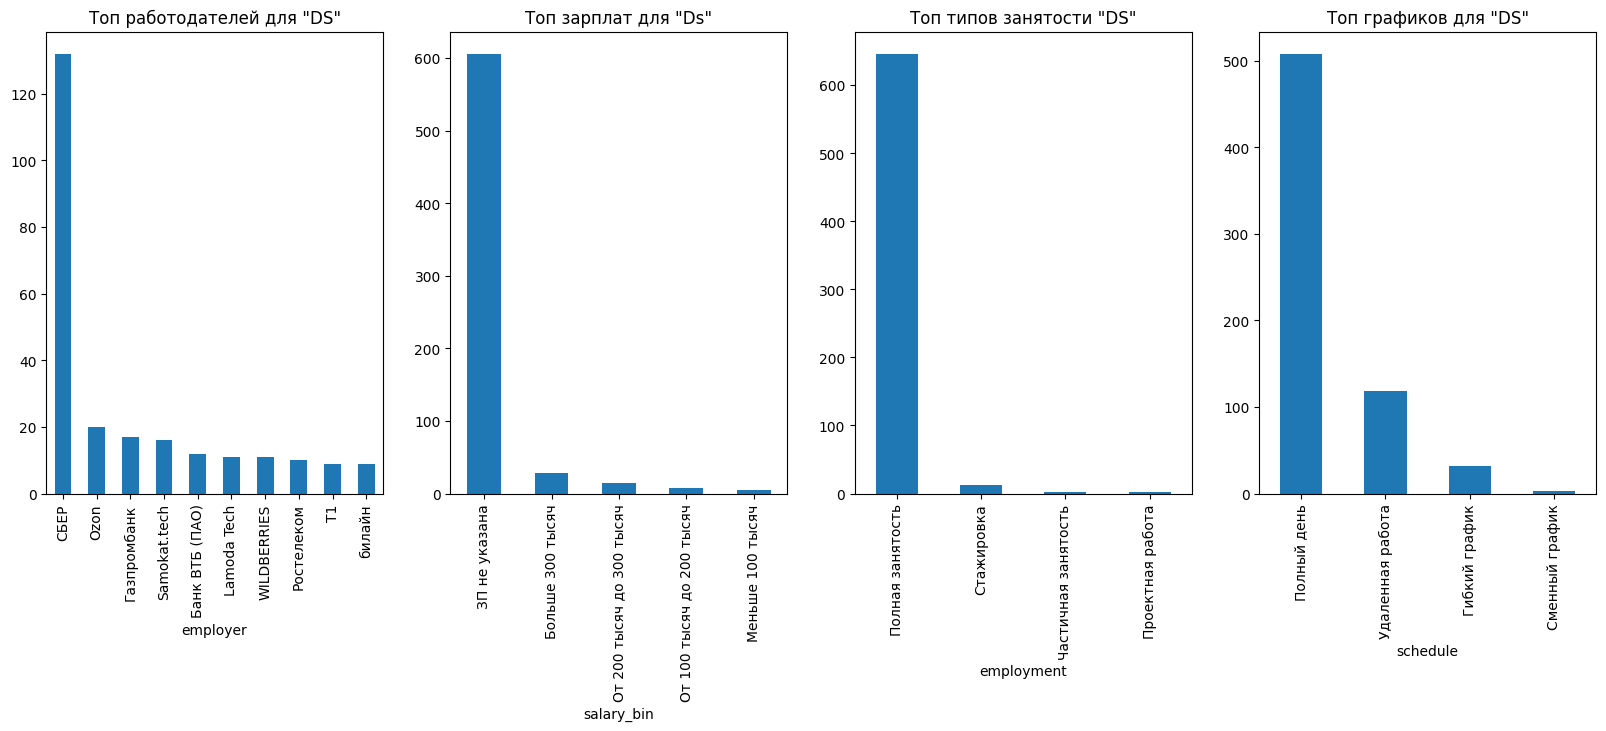

In [32]:
# Визуализация для DS по вышеперечисленным параметрам
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
top_employers_ds.plot(kind='bar')
plt.title('Топ работодателей для "DS"')
plt.subplot(1,4,2)
top_salary_bin_ds.plot(kind='bar')
plt.title('Топ зарплат для "Ds"')
plt.subplot(1,4,3)
top_employment_ds.plot(kind='bar')
plt.title('Топ типов занятости "DS"')
plt.subplot(1,4,4)
top_schedule_ds.plot(kind='bar')
plt.title('Топ графиков для "DS"')
#plt.tight_layout()
plt.show()

Для дата-сайнтистов:
- Большего всего вакансий также представлено от Сбера(132шт.), OZON- 20шт., Газпромбанк - 17шт.
- Для большинства вакансий не указана зарпалатная вилка, далее по большему количественному показателю представлены вакансии с размрером ЗП больше 300 тыс.р.
- Большинство работодателей расчитывают на соискателей с полным типом занятости, но здесь в отличие от вакансий ДА на некоторых вакансиях предлагается стажировка.
- В разрезе графика первоочередным выступает "полный день", но и "удаленка" представлена в немалом кол-ве вакансий - чуть больше четверти от вакансий с полным днем. Гибкий и сменный график не слишком распространен.

**Сравнительный вывод**
- Сбер является лидером по кол-ву предлагаемых вакансий как для ДА, так и для ДС
- уровень зарплат в представленных данных для ДС выше, чем для ДА
- тип занятости для ДА и ДС схож - приоритет отдается полной занятости.
- по графику работы аналогичная ситуация - для обоих профессий в приоритете полный день, но и удаленка имеет место быть (примерно четверть,как у ДС, так и у ДА)

### Определение типичного места работы для Аналитика данных по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы в разрезе грейдов: Junior, Junior+, Middle, Senior.

experience             employer                   
Junior (no experince)  РЕСО-Гарантия, САО              2
                       ANCOR                           1
                       DNS Технологии                  1
                       TradingView                     1
                       Альфа Капитал                   1
Junior+ (1-3 years)    СБЕР                           42
                       МТС                             6
                       Центр финансовых технологий     5
                       МАГНИТ, Розничная сеть          5
                       ПСБ (ПАО «Промсвязьбанк»)       5
Middle (3-6 years)     СБЕР                           24
                       WILDBERRIES                    11
                       «UZUM TECHNOLOGIES».            5
                       Maxim technology                4
                       АДВ                             2
Senior (6+ years)      Леруа Мерлен                    2
                       Reinvent Balti

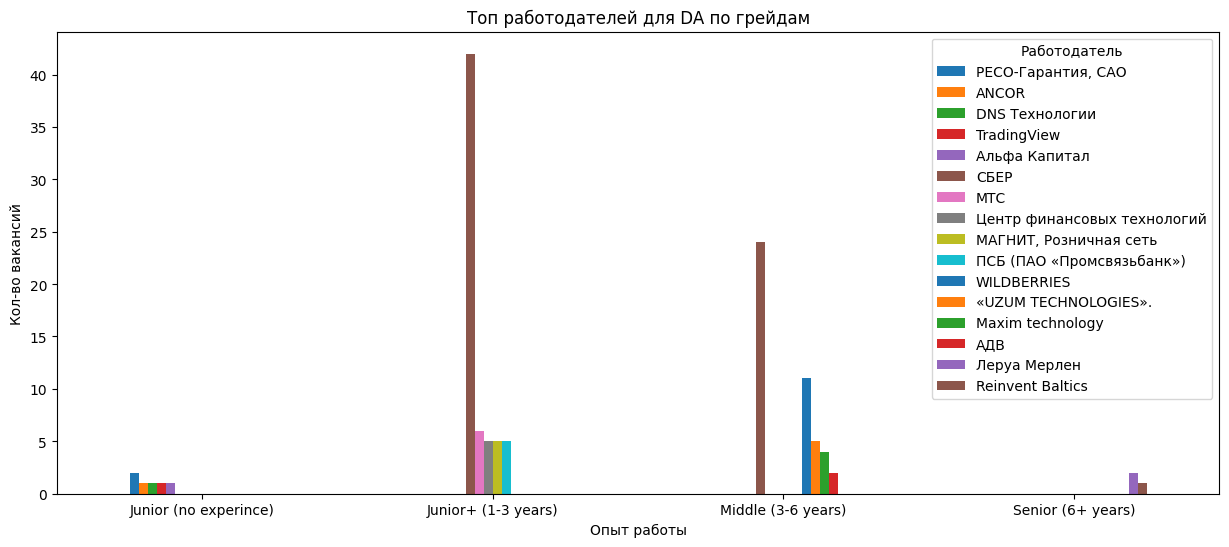

In [33]:
#определим топ работодателей для ДА по грейдам
top_employers_by_experience_da = vacancies_da['employer'].groupby(vacancies_da['experience']).value_counts().groupby(level=0).head(5)
display(top_employers_by_experience_da)#выведем на экран табличную форму информации

#построим визуализации
top_employers_by_experience_da.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ работодателей для DA по грейдам')
plt.xlabel('Опыт работы')
plt.ylabel('Кол-во вакансий')
plt.legend(title='Работодатель')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта представлено не так много работодатлей, но больше других вакансий размещено у РЕСО-Гарантия, САО
- для джунов с опытом работы СБЕР предлагает довольно больше кол-во вакансий, также представлены такие работодатели как МТС, Центр финансовых технологий, Магнити и банк ПСБ
- для мидлов также немало вакансий от Сбера, а также от РЕСО-Гарантия, САО (в сравнении намного больше чем для джунов без опыта). Имеются вакансии от компании ANCOR, DNS и TradingView
- для сеньоров представлено всего 2 работодателя - Леруа Мерлен и Reinvent Baltics

experience             salary_bin               
Junior (no experince)  ЗП не указана                  9
Junior+ (1-3 years)    ЗП не указана                163
                       От 200 тысяч до 300 тысяч      8
                       От 100 тысяч до 200 тысяч      6
                       Меньше 100 тысяч               1
Middle (3-6 years)     ЗП не указана                110
                       Больше 300 тысяч               7
                       От 200 тысяч до 300 тысяч      3
Senior (6+ years)      ЗП не указана                  3
Name: count, dtype: int64

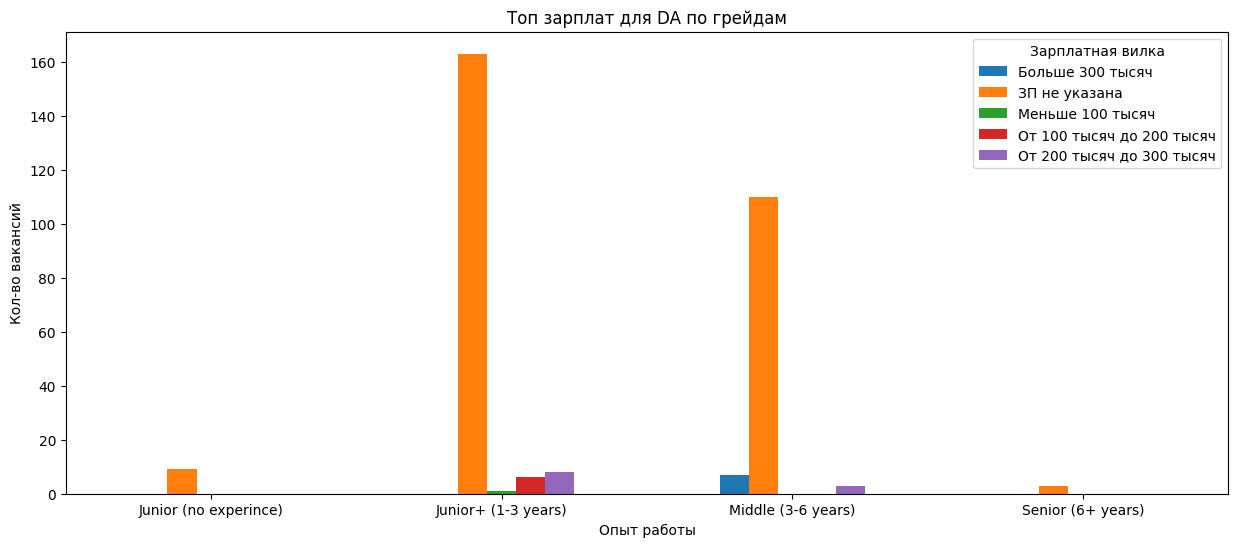

In [34]:
#определим топ зарплат для ДА по грейдам
top_salary_by_experience_da = vacancies_da['salary_bin'].groupby(vacancies_da['experience']).value_counts().groupby(level=0).head(5)
display(top_salary_by_experience_da) #выведем на экран табличную форму информации

#построим визуализации
top_salary_by_experience_da.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ зарплат для DA по грейдам')
plt.xlabel('Опыт работы')
plt.ylabel('Кол-во вакансий')
plt.legend(title='Зарплатная вилка')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта представлены только вакансии, где зарплата не указана
- для джунов с опытом работы в большинстве вакансий ЗП также не указано, но там,где возможно определить зарплатьную вилку - больше всего представлено вакансий с ЗП от 200-300 тыс.руб. и с зп от 100 до 200 тыс.руб.
- для мидлов аналогично большое кол-во вакансий без указания ЗП, а больше всего представлено вакансий с зп больше 200 тыс.
- для сеньоров (где представлено всего 3 вакансии) зп не указана.

experience             employment         
Junior (no experince)  Полная занятость         9
Junior+ (1-3 years)    Полная занятость       177
                       Частичная занятость      1
Middle (3-6 years)     Полная занятость       119
                       Частичная занятость      1
Senior (6+ years)      Полная занятость         3
Name: count, dtype: int64

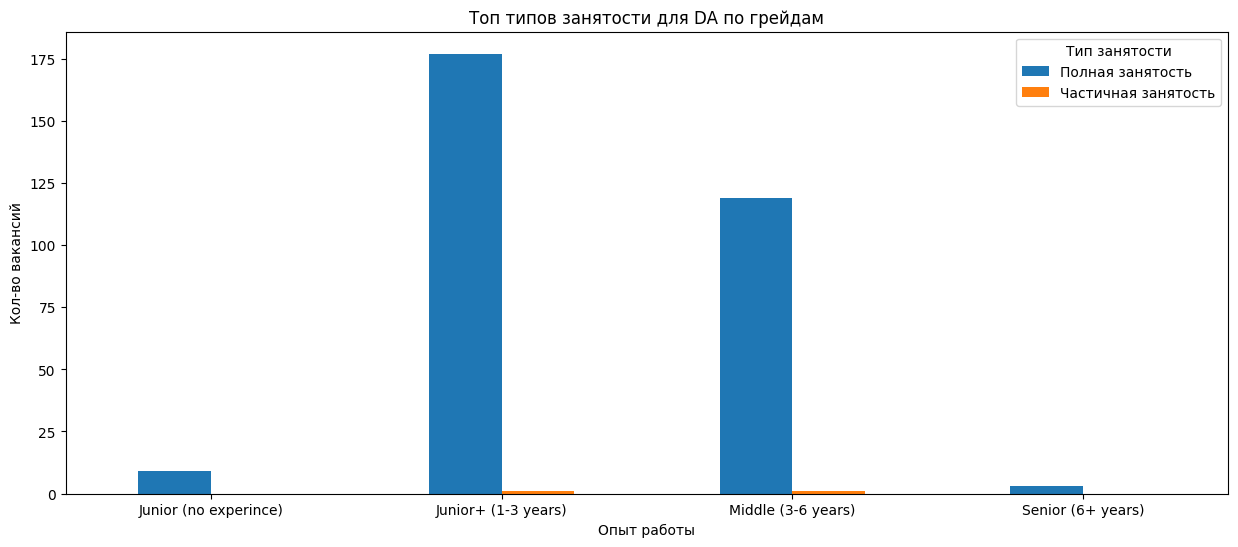

In [35]:
#определим топ типов занятостей для ДА по грейдам
top_employment_experience_da = vacancies_da['employment'].groupby(vacancies_da['experience']).value_counts().groupby(level=0).head(5)
display(top_employment_experience_da) #выведем на экран табличную форму информации

#построим визуализации
top_employment_experience_da.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ типов занятости для DA по грейдам')
plt.xlabel('Опыт работы')
plt.ylabel('Кол-во вакансий')
plt.legend(title='Тип занятости')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта представлены только вакансии с полной занятостью
- для джунов с опытом работы в 99% также представлены вакансии с полной занятостью и лишь одна с частичной занятостью
- для мидлов аналогичная ситуация, как и у джунов+
- для сеньоров (3 вакансии) - только полная занятость

experience             schedule        
Junior (no experince)  Полный день           8
                       Сменный график        1
Junior+ (1-3 years)    Полный день         135
                       Удаленная работа     35
                       Гибкий график         5
                       Сменный график        3
Middle (3-6 years)     Полный день          91
                       Удаленная работа     27
                       Гибкий график         2
Senior (6+ years)      Полный день           2
                       Удаленная работа      1
Name: count, dtype: int64

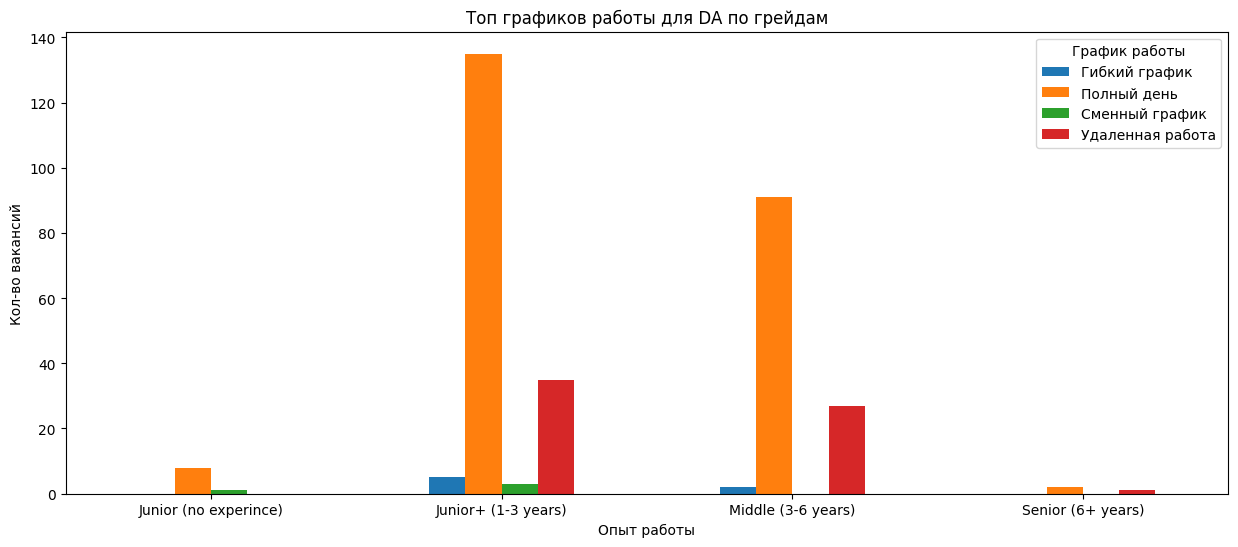

In [36]:
#определим топ графиков работ для ДА по грейдам
top_schedule_experience_da = vacancies_da['schedule'].groupby(vacancies_da['experience']).value_counts().groupby(level=0).head(5)
display(top_schedule_experience_da) #выведем на экран табличную форму информации

#построим визуализации
top_schedule_experience_da.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ графиков работы для DA по грейдам')
plt.xlabel('Опыт работы')
plt.ylabel('Кол-во вакансий')
plt.legend(title='График работы')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта в большинстве вакансии представлен тип занятости в виде полного рабочего дня
- для джунов с опытом работы - также большая часть вакансий указана с полным днем, но уже встречается удаленный формат работы, чуть меньше в количественном эквиваленте - гибкий и сменный график.
- для мидлов - полный день в приоритете, но также встречается удаленный формат (примерно треть от кол-ва вакансий с полным днем), а 2 вакансии с гибким графиком
- для сеньоров представлено 2 вакансии с полным рабочим днем и 1 с удаленным.

### Определение типичного места работы для специалиста Data-Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы в разрезе грейдов: Junior, Junior+, Middle, Senior.

experience             employer                     
Junior (no experince)  СБЕР                              9
                       Ozon                              3
                       Правительство Москвы              2
                       Lamoda Tech                       2
                       Changellenge                      1
Junior+ (1-3 years)    СБЕР                             60
                       Ростелеком                       10
                       Банк ВТБ (ПАО)                    8
                       Samokat.tech                      7
                       Сахалин - Остров Возможностей     7
Middle (3-6 years)     СБЕР                             61
                       Ozon                             13
                       Газпромбанк                      10
                       WILDBERRIES                       9
                       Lamoda Tech                       9
Senior (6+ years)      Fundraise Up                      2
   

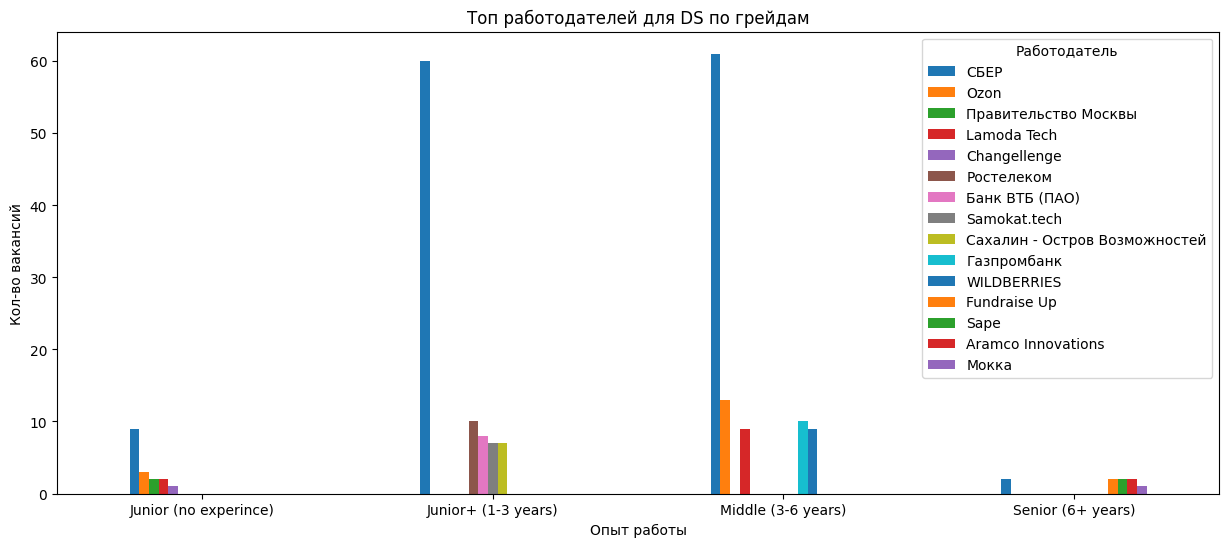

In [37]:
#определим топ работодателей для ДС по грейдам
top_employers_by_experience_ds = vacancies_ds['employer'].groupby(vacancies_ds['experience']).value_counts().groupby(level=0).head(5)
display(top_employers_by_experience_ds)#выведем на экран табличную форму информации

#построим визуализации
top_employers_by_experience_ds.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ работодателей для DS по грейдам')
plt.xlabel('Опыт работы')
plt.ylabel('Кол-во вакансий')
plt.legend(title='Работодатель')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта в основном представлены вакансии от Сбера, также встречаются вакансии от Озона, Правительства Москвы, Lamoda Tech и Changellenge;                  
- для джунов с опытом работы - абсолютное большинство вакансий представлено Сбером, также неплохое кол-во вакансий выложено от Ростелекома. Встречаются вакансии Банка Втб, Самоката и Сахалин - Остров Возможностей
- для мидлов также представлено большое кол-во вакансий от Сбера, на втором месте Озон, на третьем Газпромбанк
- для сеньоров представлено не так много работодатлей, из выложенных можно выделить Fundraise Up, Сбер, Sape, Aramco Innovations и Мокка

experience             salary_bin               
Junior (no experince)  ЗП не указана                 25
                       Меньше 100 тысяч               1
Junior+ (1-3 years)    ЗП не указана                261
                       Больше 300 тысяч              13
                       От 200 тысяч до 300 тысяч      7
                       Меньше 100 тысяч               4
                       От 100 тысяч до 200 тысяч      4
Middle (3-6 years)     ЗП не указана                300
                       Больше 300 тысяч              14
                       От 200 тысяч до 300 тысяч      7
                       От 100 тысяч до 200 тысяч      3
Senior (6+ years)      ЗП не указана                 20
                       Больше 300 тысяч               2
                       От 100 тысяч до 200 тысяч      1
Name: count, dtype: int64

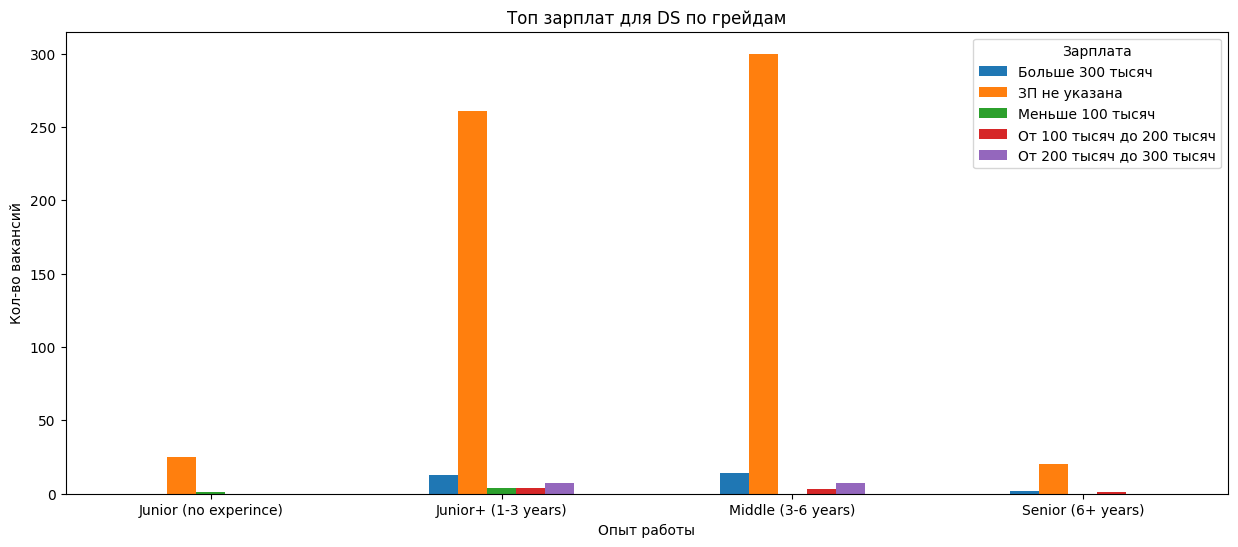

In [38]:
#определим топ зарплат для ДС по грейдам
top_salary_by_experience_ds = vacancies_ds['salary_bin'].groupby(vacancies_ds['experience']).value_counts().groupby(level=0).head(5)
display(top_salary_by_experience_ds)#выведем на экран табличную форму информации

#построим визуализации
top_salary_by_experience_ds.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ зарплат для DS по грейдам')
plt.xlabel('Опыт работы')
plt.ylabel('Кол-во вакансий')
plt.legend(title='Зарплата')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта определена всего 1 вакансия с указанием зп меньше 100 тыс. В остальных вакансиях из представленной выборки зп не указана.
- для джунов с опытом работы преобладают вакансии без указания ЗП, но что удивительно, встречаются целых 13 вакансий с зп больше 300 тыс.Имеюстя вакансии с зп меньше 100 тыс.р., что логично.
- для мидлов также в большиснтве случаев зп не указана и встречаются вакансии с разными вилками - и от 100 до 200 и от 200 до 300. ЗП меньше 100 тысяч уже не предлагается
- для сеньоров - аналогичная ситуация, в выборке больше всего вакансий без указания зп, а где указана есть 2 вакансии с ЗП больше 300 тыс., и 1 с вилкой от 100 до 200 тыс.руб.

experience             employment         
Junior (no experince)  Полная занятость        14
                       Стажировка              12
Junior+ (1-3 years)    Полная занятость       286
                       Проектная работа         2
                       Частичная занятость      1
Middle (3-6 years)     Полная занятость       323
                       Частичная занятость      1
Senior (6+ years)      Полная занятость        23
Name: count, dtype: int64

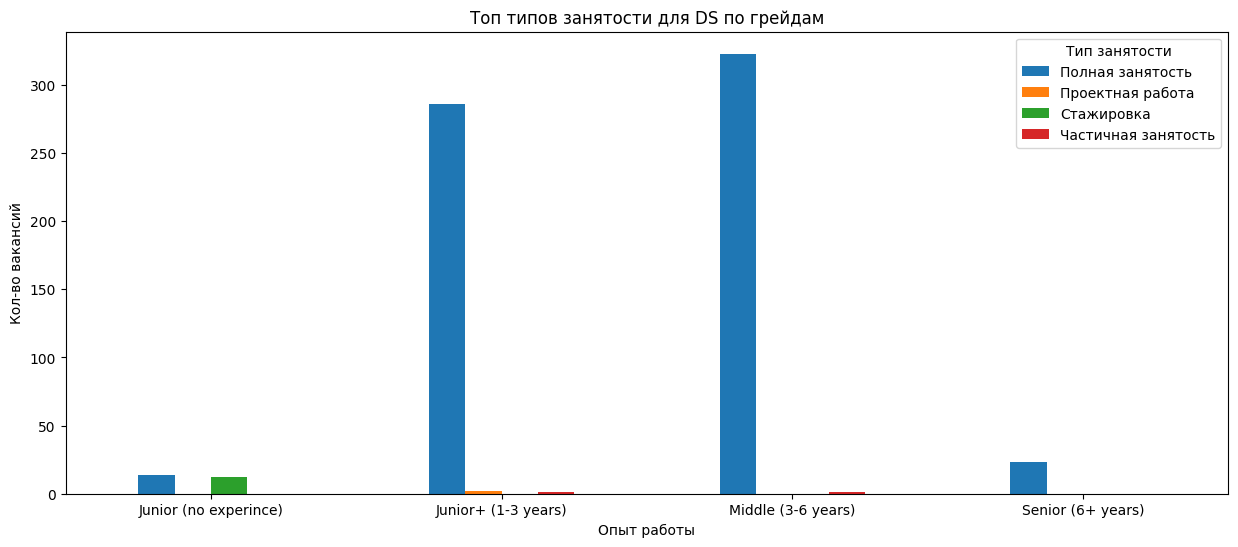

In [39]:
#определим топ типов занятости для ДС по грейдам
top_employment_by_experience_ds = vacancies_ds['employment'].groupby(vacancies_ds['experience']).value_counts().groupby(level=0).head(5)
display(top_employment_by_experience_ds)#выведем на экран табличную форму информации

#построим визуализации
top_employment_by_experience_ds.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ типов занятости для DS по грейдам')
plt.xlabel('Опыт работы')
plt.ylabel('Кол-во вакансий')
plt.legend(title='Тип занятости')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта представлены примерно в одинаковом кол-ве вакансии с полной занятостью или же в виде стажировки;
- для джунов с опытом работы преобладает полная занятость, в единичных случаях - проектная работа и частичная занятость;
- для мидлов - примерно аналогичная ситуация, в большинстве своем требуется полная занятость, есть одна вакансия с частичной занятостью;
- для сеньоров представлена только полная занятость.

experience             schedule        
Junior (no experince)  Полный день          19
                       Гибкий график         5
                       Удаленная работа      2
Junior+ (1-3 years)    Полный день         217
                       Удаленная работа     63
                       Гибкий график         8
                       Сменный график        1
Middle (3-6 years)     Полный день         256
                       Удаленная работа     50
                       Гибкий график        17
                       Сменный график        1
Senior (6+ years)      Полный день          16
                       Удаленная работа      4
                       Гибкий график         2
                       Сменный график        1
Name: count, dtype: int64

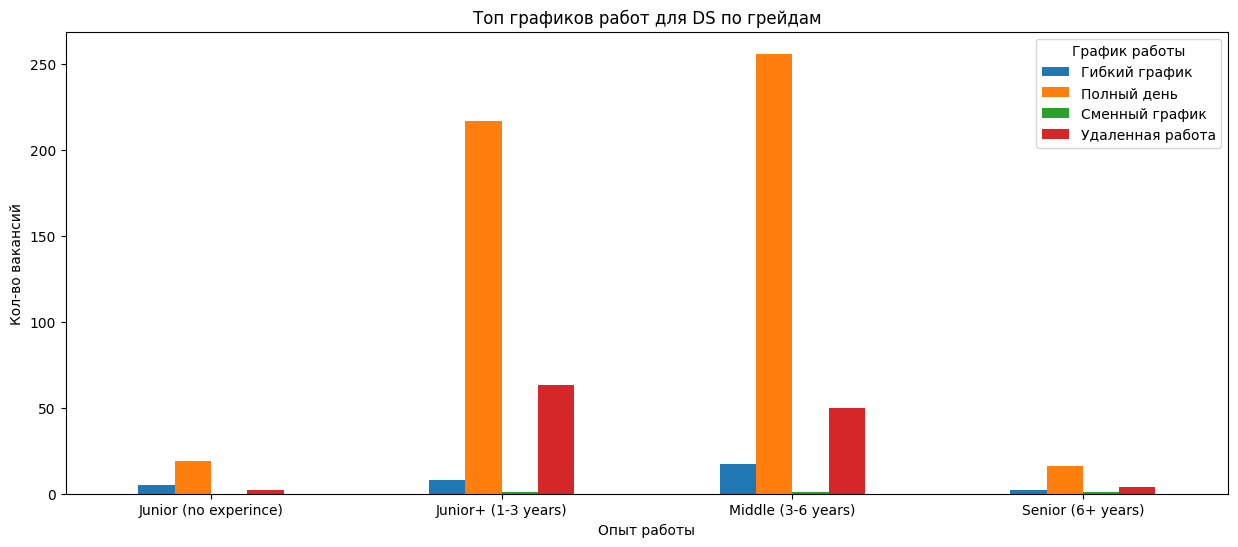

In [40]:
#определим топ графиков работы для ДС по грейдам
top_schedule_by_experience_ds = vacancies_ds['schedule'].groupby(vacancies_ds['experience']).value_counts().groupby(level=0).head(5)
display(top_schedule_by_experience_ds)#выведем на экран табличную форму информации

#построим визуализации
top_schedule_by_experience_ds.unstack().plot(figsize=(15,6), kind='bar', stacked=False)
plt.title('Топ графиков работ для DS по грейдам')
plt.xlabel('Опыт работы')
plt.ylabel('Кол-во вакансий')
plt.legend(title='График работы')
plt.xticks(rotation=0)
plt.show()

- для джунов без опыта в большинстве вакансий требуется полный рабочий день, представлено немного вакансий с гибким графиком и даже несколько с удаленным форматом работы.
- для джунов с опытом работы преобладает полный рабочий день, но также немалую часть занимают вакансии с удаленным форматом работы, менее популярны - гибкий  и сменный график
- для мидлов больше всего вакансий представлено с полным рабочим днем, также имеются вакансии с удаленкой, но даже чуть меньше чем у джуниоров. Менее представлены гибкий график и есть 1 вакансия со сменным графиком
- для сеньоров также большую часть занимают вакансии с полным днем, и примерно в равном количестве удаленка, гибкий и сменный график

 ## Расчет помесячной динамики количества вакансий для Аналитика данных и специалиста по Data Science. Ответ рассмотрим отдельно для грейдов Junior, Junior+, Middle, Senior.

Начнем с аналитиков данных

In [41]:
vacancies_da['month'] = vacancies_da['published_at'].dt.month #посмотрим сколько месяцев у нас представлено в выборке
print('Количество месяцев в выборке',vacancies_da['month'].nunique())

Количество месяцев в выборке 2


Так как представлено всего 2 месяца, логичнее посмотреть динамику в разрезе дней, так будет более информативно

In [42]:
vacancies_da['day'] = vacancies_da['published_at'].dt.to_period('D')

# Группировка данных по дням и грейдам
grouped_da = vacancies_da.groupby(['day', 'experience']).size().unstack(fill_value=0)
grouped_da

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
day,,,,
2024-03-06,0,4,0,0
2024-03-07,0,1,0,0
2024-03-12,0,1,0,0
2024-03-13,0,2,0,0
2024-03-14,0,2,1,0
2024-03-15,0,4,2,0
2024-03-16,0,1,4,0
2024-03-17,0,0,1,0
2024-03-18,1,5,4,0


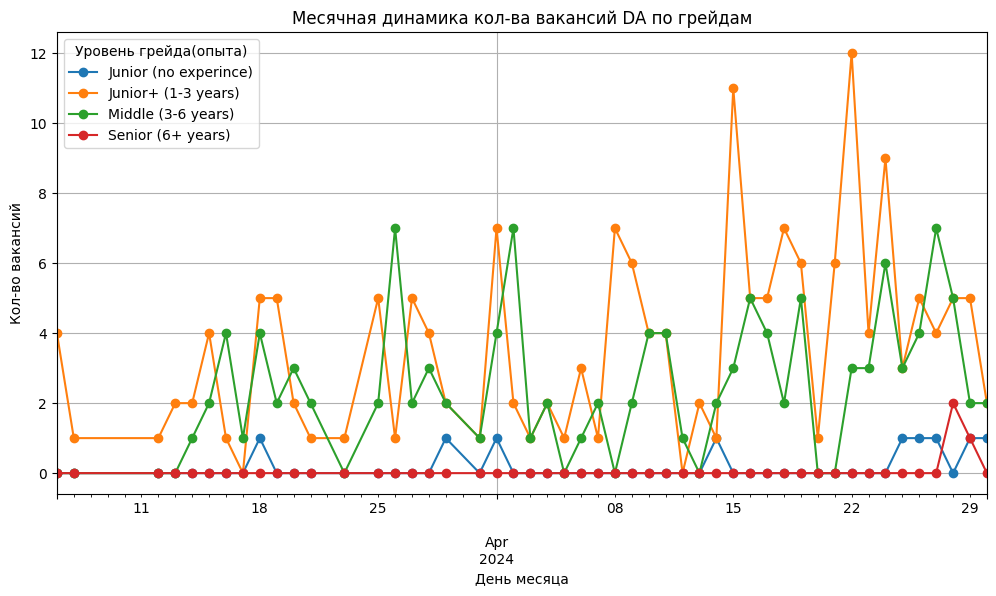

In [43]:

# Группировка данных по дням и грейдам
grouped_da = vacancies_da.groupby(['day', 'experience']).size().unstack().fillna(0)

# Построение пересекающегося графика с маркерами
grouped_da.plot(figsize=(12, 6), marker='o',alpha = 1)
plt.title('Месячная динамика кол-ва вакансий DA по грейдам')
plt.xlabel('День месяца')
plt.ylabel('Кол-во вакансий')
plt.legend(title='Уровень грейда(опыта)')
plt.grid(True)
plt.show()

По представленному графику можно увидеть, что джунов без опыта и сеньеров в целом ищут очень мало работодателей, вакансий джунов без опыта даже больше, чем сеньёров. Касательно джунов с опытом можно сказать, что наблюдаются скачкообразные волны уменьешния и увеличения кол-ва размещенных вакансий, а также можно обратить внимание, что во второй половине апреля кол-во размещенных вакансий увеличивается. В разрезе мидлов также наблюдаются скачки по количеству размещенных вакансий то вниз, то вверх, максимально в день было размещено 7 вакансий.

*Теперь посмотрим динамику вакансий для специалиста по Data Science*

In [44]:
vacancies_ds['month'] = vacancies_ds['published_at'].dt.month #посмотрим сколько месяцев у нас представлено в выборке
print('Количество месяцев в выборке',vacancies_ds['month'].nunique())

Количество месяцев в выборке 3


Также сделаем разбивку по дням, а не месяцам. Хоть месяцев и три, но в феврале размещена всего 1 вакансия.

In [45]:
vacancies_ds['day'] = vacancies_ds['published_at'].dt.to_period('D')

# Группировка данных по дням и грейдам
grouped_ds = vacancies_ds.groupby(['day', 'experience']).size().unstack(fill_value=0)
grouped_ds

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
day,,,,
2024-02-29,0,0,0,1
2024-03-04,1,3,2,0
2024-03-05,0,2,4,0
2024-03-06,0,5,7,1
2024-03-07,0,1,6,0
2024-03-08,0,1,0,0
2024-03-11,1,5,5,0
2024-03-12,0,7,7,0
2024-03-13,1,2,4,1


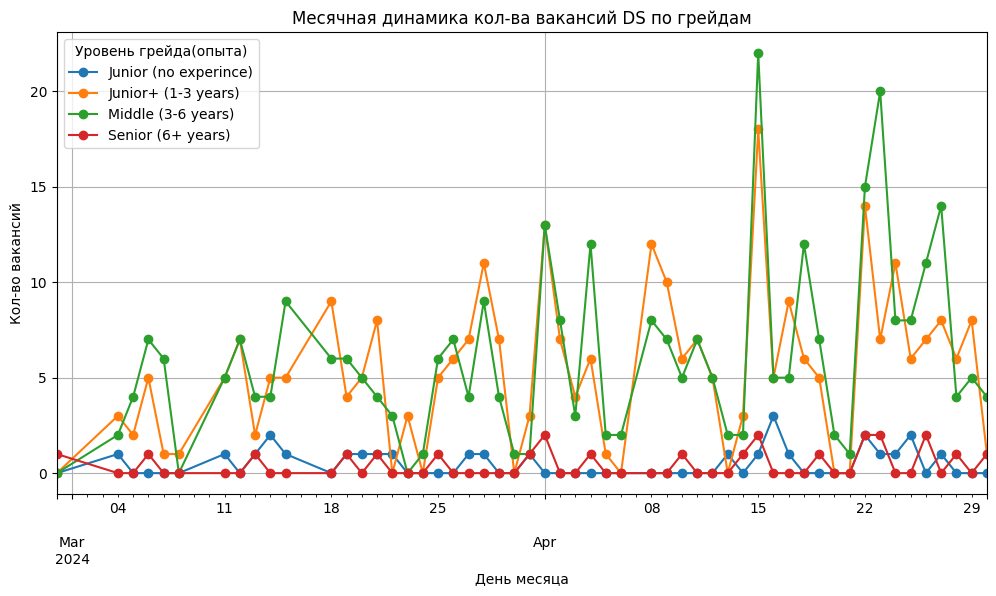

In [46]:
# Группировка данных по дням и грейдам
grouped_ds = vacancies_ds.groupby(['day', 'experience']).size().unstack().fillna(0)

# Построение пересекающегося графика с маркерами
grouped_ds.plot(figsize=(12, 6), marker='o',alpha = 1)
plt.title('Месячная динамика кол-ва вакансий DS по грейдам')
plt.xlabel('День месяца')
plt.ylabel('Кол-во вакансий')
plt.legend(title='Уровень грейда(опыта)')
plt.grid(True)
plt.show()

По представленному графику можем увидеть, что ситуация в разрезе джунов без опыта и сеньеров схожая с помесячным графиком вакансий DA - таких соискателей требуется в очень ограниченном количестве, размещается по 1-2, максимум 3 вакансии. Но так или иначе на должность сеньера DS размещено больше вакансий, чем для сеньера DA. По джунам+ ситуация получше, видны скачки, но дней, когда вообще не размещалось таких вакансий довольно мало в представленном временном интервале, со второй половины апреля наблюдаются скачки по увеличению размещенных вакансий. По вакансиям мидлов также наблюдаются волнообразные скачки вверх-вниз, но так или иначе вакансии продолжают размещаться(представлено всего 3 дня, когда вакансия мидла не размещалась вообще). Во второй половине апреля также виден рост кол-ва размещенных вакансий.   

#Общие выводы и рекомендации

1.	**Определили в каких городах преимущественно размещены вакансии по двум направлениям:** безоговорочное первое место в рейтинге городов по кол-ву размещенных вакансий для обеих позиций является Москва. Санкт-Петербург также для двух должностей идет на втором месте. Для DA в топе также находятся Екатеринбург, Новосибирск и Краснодар. Для DS - Новосибирск, Нижний Новгород, Казань.
2.	**Определили доли грейдов среди двух исследуемых вакансий:**
- в разрезе аналитиков можем наблюдать, что доля позиций Джуниор+ является наиболее востребованной(57,4%), а сеньёров ищут меньше всего.(1%)
- в разрезе дата-сайтнистов можем наблюдать, что больше всего востребованы "мидлы" - 48,9%, но и доля "джуниоров+" тоже не мала - 43,7%. "Джуниоры" и "сеньоры" представлены в гораздо меньшем количестве - 3,9% и 3,5%, соответственно.
3.	**Определили наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: ключевые навыки, самые важные hard-skils, самые важные soft-skils.**
<br>**3.1. 	Для аналитиков данных:**
- Ключевыми навыками являются знание sql,python, data analysis.
- Топ хард скиллов - pandas, confluence, юнит-экономика
-	Топ софт скиллов - знание документации, коммуникация и аналитическое мышление
<br>*Рассмотрели вышеуказанные параметры по грейдам и можем рекомендовать следующих «идеальных» кандидатов:*
- Джуниор без опыта: знание sql и python, также важны, но меньше ранее названных - знание airflow, data analysis, data science. Софт-скиллы: аналитическое мышление и коммуникация. Хард-скиллы:  наиболее важным хард-скиллом является знание библиотеки pandas.
- Джуниор с опытом: ключевым навыком является знание sql, далее идет python, также можно выделить знание анализа данных и аналитическое мышление. Софт-скиллы: наиболее важными навыками явлются аналитическое мышление и коммуникация. Хард-скиллы:  знание pandas, confluence, юнит-экономика
- Миддл позиция: знание python становится чуть более востребованным, чем sql. Также важны знания в области data analysis и power bi. Софт-скиллы:  знание документации, навыки коммуникации, проактивная позиция, владение мастерством переговоров и аналитичсекое мышление. Хард-скиллы:  важны pandas, confluence, юнит-экономика и в меньшей степени google-sheets
- Сеньер: важны навыки в области sql,python, data analysis, а/в тестировании. Софт-скиллы:  в равной степени знание документации, навыки коммуникации, проактивная позиция, владение мастерством переговоров и аналитичсекое мышление. Хард-скиллы: навыки pandas, confluence, юнит-экономика важны в равном объеме<br>**3.2. Для дата-сайнтистов:**
- Ключевыми навыками являются знание python,sql, machine learning.
- Топ хард скиллов - pandas, confluence, юнит-экономика
-	Топ софт скиллов - знание документации, коммуникация и аналитическое мышление
<br>*Также рассмотрели вышеуказанные параметры по грейдам и можем рекомендовать следующих «идеальных» кандидатов:*
- Джуниор без опыта: знание python, также важны, но меньше ранее названного - знание machine learning и математической статистики, data mining. Софт-скиллы: знание документации, аналитическое мышление и презентация результатов. Хард-скиллы:  знание библиотеки pandas, confluence, юнит-экономика.
- Джуниор с опытом: первоочередным ключевым навыком является знание python, далее идет sql, также можно выделить знание machine learning и математической статистики. Софт-скиллы:  знание документации, также навыки коммуникации и аналитическое мышление, креативность и презентация результатов. Хард-скиллы:   знание pandas, далее - confluence, юнит-экономика.
- Миддл позиция: знание python становится еще более востребованным, также необходимо знание sql, machine learning, data science. Софт-скиллы:  знание документации, навыки коммуникации, проактивная позиция, умение принятия решений и аналитичсекое мышление. Хард-скиллы:  знание pandas, далее - confluence, юнит-экономика.
- Сеньер: важны навыки в области sql,python,ml, а также появлется такое требумое умение, как знание PyTorch(в других вакансиях этому скилу не уделяется внимание). Софт-скиллы: знания документации, развитые навыки коммуникации, умение презентовать результаты, принятие решений и адаптивность.. Хард-скиллы: на первом месте остается pandas, а далее confluence, юнит-экономика, которые важны в равном объеме.

**4. Определили типичное места работы для Аналитика данных и специалиста по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы.**
<br>**4.1. Для аналитиков данных:**
- Большего всего вакансий представлено от Сбера(67 шт.), Wildberries(далее - WB)- 14шт., далее идут также немало известные компании, но количество вакансий представлено в пределах 4-7 штук.
- Для большинства вакансий не указана зарплатная вилка, далее по большему количественному показателю представлены вакансии в промежутке от 200 до 300 тыс.р.
- Большинство работодателей рассчитывают на соискателей с полным типом занятости
- В разрезе графика первоочередным выступает "полный день", но и "удаленка" представлена в немалом кол-ве вакансий. Гибкий и сменный график не слишком распространен.
<br>***Определили типичное место работы по вышеуказанным параметрам для аналитика данных по грейдам:***
-	для джунов без опыта представлено не так много работодателей, но больше других вакансий размещено у РЕСО-Гарантия, САО, представлены только вакансии, где зарплата не указана, можно рассчитывать только на полную занятость и по большей части на полный рабочий день
-	для джунов с опытом работы СБЕР предлагает довольно больше кол-во вакансий, также представлены такие работодатели как МТС, Центр финансовых технологий, Магнит и банк ПСБ. в большинстве вакансий ЗП также не указано, но там,где возможно определить зарплатьную вилку - больше всего представлено вакансий с ЗП от 200-300 тыс.руб. и с зп от 100 до 200 тыс.руб. Можно рассчитывать на полную занятость, полный рабочий день, но уже встречается удаленный формат работы, чуть меньше в количественном эквиваленте - гибкий и сменный график.
- для мидлов также немало вакансий от Сбера, а также от РЕСО-Гарантия, САО (в сравнении намного больше чем для джунов без опыта). Имеются вакансии от компании ANCOR, DNS и TradingView. Большое кол-во вакансий без указания ЗП, а больше всего представлено вакансий с зп больше 200 тыс. Как правило предлагают полную занятость, полный рабочий день, но также встречается удаленный формат (примерно треть от кол-ва вакансий с полным днем)
- для сеньоров представлено всего 2 работодателя - Леруа Мерлен и Reinvent Baltics, за не указана (так как рассматривается всего 3 вакансии), только полная занятость, представлено 2 вакансии с полным рабочим днем и 1 с удаленным.

**4.2. Для дата-сайнтистов:**
- Большего всего вакансий также представлено от Сбера(132шт.), OZON- 20шт., Газпромбанк - 17шт.
- Для большинства вакансий не указана зарпалатная вилка, далее по большему количественному показателю представлены вакансии с размером ЗП больше 300 тыс.р.
- Большинство работодателей рассчитывают на соискателей с полным типом занятости, но здесь в отличие от вакансий ДА на некоторых вакансиях предлагается стажировка.
- В разрезе графика первоочередным выступает "полный день", но и "удаленка" представлена в немалом кол-ве вакансий - чуть больше четверти от вакансий с полным днем. Гибкий и сменный график не слишком распространен. <br>***Также определили типичное место работы по вышеуказанным параметрам для для специалиста Data-Science по грейдам:***
- для джунов без опыта в основном представлены вакансии от Сбера, также встречаются вакансии от Озона, Правительства Москвы, Lamoda Tech и Changellenge. Определена всего 1 вакансия с указанием зп меньше 100 тыс. В остальных вакансиях из представленной выборки зп не указана. В одинаковом кол-ве вакансии с полной занятостью или же в виде стажировки. в большинстве вакансий требуется полный рабочий день.
- для джунов с опытом работы - абсолютное большинство вакансий представлено Сбером, также неплохое кол-во вакансий выложено от Ростелекома. Встречаются вакансии Банка Втб, Самоката и Сахалин - Остров Возможностей. Рассмотрено целых 13 вакансий с зп больше 300 тыс.Имеюстя вакансии с зп меньше 100 тыс.р., что логично. Преобладает полная занятость, в единичных случаях - проектная работа и частичная занятость. Больше всего вакансий, где полный рабочий день, но также немалую часть занимают вакансии с удаленным форматом работы
- для мидлов также представлено большое кол-во вакансий от Сбера, на втором месте Озон, на третьем Газпромбанк. В большинстве случаев зп не указана и встречаются вакансии с разными вилками - и от 100 до 200 и от 200 до 300. ЗП меньше 100 тысяч уже не предлагается. Требуется полная занятость, полный рабочий день, примерно 1/5 вакансий с удаленкой.
- для сеньоров представлено не так много работодателей, из выложенных можно выделить Fundraise Up, Сбер, Sape, Aramco Innovations и Мокка. больше всего вакансий без указания зп, а где указана есть 2 вакансии с ЗП больше 300 тыс., и 1 с вилкой от 100 до 200 тыс.руб. только полная занятость  с полным днем, и примерно в равном количестве удаленка, гибкий и сменный график

**4.3. Сравнили вышеуказанные параметры по вакансиям DA и DS:**
- Сбер является лидером по кол-ву предлагаемых вакансий как для ДА, так и для ДС
- уровень зарплат в представленных данных для ДС выше, чем для ДА
- тип занятости для ДА и ДС схож - приоритет отдается полной занятости.
- по графику работы аналогичная ситуация - для обоих профессий в приоритете полный день, но и удаленка имеет место быть (примерно четверть,как у ДС, так и у ДА)

<br>**5.Рассчитали помесячную динамику количества вакансий для Аналитика данных и специалиста по Data Science:**
- Для DA: джунов без опыта и сеньеров в целом ищут очень мало работодателей, вакансий джунов без опыта даже больше, чем сеньёров. Касательно джунов с опытом можно сказать, что наблюдаются скачкообразные волны уменьешния и увеличения кол-ва размещенных вакансий, а также можно обратить внимание, что во второй половине апреля кол-во размещенных вакансий увеличивается. В разрезе мидлов также наблюдаются скачки по количеству размещенных вакансий то вниз, то вверх, максимально в день было размещено 7 вакансий.
- Для DS: ситуация в разрезе джунов без опыта и сеньеров схожая с помесячным графиком вакансий DA - таких соискателей требуется в очень ограниченном количестве, размещается по 1-2, максимум 3 вакансии. Но так или иначе на должность сеньера DS размещено больше вакансий, чем для сеньера DA. По джунам+ ситуация получше, видны скачки, но дней, когда вообще не размещалось таких вакансий довольно мало в представленном временном интервале, со второй половины апреля наблюдаются скачки по увеличению размещенных вакансий. По вакансиям мидлов также наблюдаются волнообразные скачки вверх-вниз, но так или иначе вакансии продолжают размещаться(представлено всего 3 дня, когда вакансия мидла не размещалась вообще). Во второй половине апреля также виден рост кол-ва размещенных вакансий.



Ссылка на презентацию: https://docs.google.com/presentation/d/1KkGQQuW-AL-m38RUskkeK2gVCTuCPIP9/edit?usp=drive_link&ouid=112914491363693762987&rtpof=true&sd=true